## Assignment for Week 1 - Introduction to Machine Learning

UCI Riverside Heart Disease dataset
We will use the heart.disease.data file, which has 14 attributes and 1 target variable

Objectives:
* Impute missing data (don’t just throw it away)
  * '-9' means missing
* Look at the data with EDA
* Drop unnecessary columns, if needed, and defend your decision to do so.
* Deal with outliers (maybe make a boxplot)
* Provide a brief summary of how you prepared your data for future analysis.

Dataset Location:
http://archive.ics.uci.edu/ml/datasets/heart+Disease
(also provided in the assign_wk1.zip)

Deliverables:

Upload your notebook's .ipynb file
Your completed notebook.

# Assignment 1 - Solution code

# Data
Given UCI Riverside Heart Disease dataset We will use the heart.disease.data file, which has 14 attributes and 1 target variable

Before doing the given objectives we need to load the data and look at the data, The overall ojective of this code is to clean and grrom our heart disease data to support machinelearning efforts

# Imorting all the required libraries

In [2]:
# Import necessary libraries for data analysis
import pandas as pd
import numpy as np
import random as rnd

In [3]:
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Import necessary libraries for machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [5]:
import warnings
warnings.filterwarnings("ignore")

# Acquire Data

We have to read the data file and store it as a dataframe to perform the required activies. This is done using Pandas library.

In [6]:
#Reading the datafile
Heartdata_df = pd.read_csv('F:/Balaram/ML course/assign_wk1/heart.disease.data')

Here we dont have a sepearate training data and test data files as given in titanic example, hence wheneverwe need a test and train data we can split the dara using test_train_split

In [7]:
# Check how the datafile looks like 
# looking at first 10 rows of data
Heartdata_df.head(10)

,age,sex,cp,trestbps,chol,cigs,years,fbs,dm,famhist,restecg,thalach,exang,thal,num
0,63,1,1,145,233,50,20,1,-9,1,2,150,0,6,0
1,67,1,4,160,286,40,40,0,-9,1,2,108,1,3,2
2,67,1,4,120,229,20,35,0,-9,1,2,129,1,7,1
3,37,1,3,130,250,0,0,0,-9,1,0,187,0,3,0
4,41,0,2,130,204,0,0,0,-9,1,2,172,0,3,0
5,56,1,2,120,236,20,20,0,-9,1,0,178,0,3,0
6,62,0,4,140,268,0,0,0,-9,1,2,160,0,3,3
7,57,0,4,120,354,0,0,0,-9,1,0,163,1,3,0
8,63,1,4,130,254,0,0,0,-9,0,2,147,0,7,2
9,53,1,4,140,203,20,25,1,-9,1,2,155,1,7,1


In [8]:
# look at the columns of data
print(Heartdata_df.columns.values)

['age' 'sex' 'cp' 'trestbps' 'chol' 'cigs' 'years' 'fbs' 'dm' 'famhist'
 'restecg' 'thalach' 'exang' 'thal' 'num']


As given data has 15 columns where 14 are input variables and 1 output variables

The actual meaning of all these variables were taken for more clarity, better EDA and analyss


Below is a detailed explanation of each column, followed by an outline of the objectives and tasks for the analysis, and finally the complete Python code for performing the analysis in a Jupyter Notebook.

# Column Descriptions:
        age: Age of the patient in years.
        sex: Sex of the patient (1 = male, 0 = female).
        cp: Chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic).
        trestbps: Resting blood pressure (in mm Hg).
        chol: Serum cholesterol level (in mg/dl).
        cigs: Number of cigarettes smoked per day.
        years: Number of years of smoking.
        fbs: Fasting blood sugar (1 = fasting blood sugar > 120 mg/dl, 0 = otherwise).
        dm: Presence of diabetes mellitus (1 = yes, 0 = no).
        famhist: Family history of heart disease (1 = yes, 0 = no).
        restecg: Resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing
        probable/definite left ventricular hypertrophy).
        thalach: Maximum heart rate achieved.
        exang: Exercise-induced angina (1 = yes, 0 = no).
        thal: Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect).
        num: Target variable (0 = no heart disease, 1,2,3,4).

Source: Chatgpt, http://archive.ics.uci.edu/ml/datasets/heart+Disease

# analyze by describing the data

By analyzing the feature names and their datatypes, we are gonna see which of them are categorical variables and which of them are numerical variables


In [9]:
# preview the data
Heartdata_df.head(20)

,age,sex,cp,trestbps,chol,cigs,years,fbs,dm,famhist,restecg,thalach,exang,thal,num
0,63,1,1,145,233,50,20,1,-9,1,2,150,0,6,0
1,67,1,4,160,286,40,40,0,-9,1,2,108,1,3,2
2,67,1,4,120,229,20,35,0,-9,1,2,129,1,7,1
3,37,1,3,130,250,0,0,0,-9,1,0,187,0,3,0
4,41,0,2,130,204,0,0,0,-9,1,2,172,0,3,0
5,56,1,2,120,236,20,20,0,-9,1,0,178,0,3,0
6,62,0,4,140,268,0,0,0,-9,1,2,160,0,3,3
7,57,0,4,120,354,0,0,0,-9,1,0,163,1,3,0
8,63,1,4,130,254,0,0,0,-9,0,2,147,0,7,2
9,53,1,4,140,203,20,25,1,-9,1,2,155,1,7,1


In [10]:
Heartdata_df.tail(20)

,age,sex,cp,trestbps,chol,cigs,years,fbs,dm,famhist,restecg,thalach,exang,thal,num
262,60,0,1,150,240,0,0,0,-9,0,0,171,0,3,0
263,44,1,3,120,226,80,4,0,-9,0,0,169,0,3,0
264,61,1,4,138,166,40,4,0,-9,1,2,125,1,3,4
265,42,1,4,136,315,40,18,0,-9,1,0,125,1,6,2
266,52,1,4,128,204,0,0,1,-9,1,0,156,1,-9,2
267,59,1,3,126,218,0,0,1,-9,1,0,134,0,6,2
268,40,1,4,152,223,25,27,0,-9,0,0,181,0,7,1
269,42,1,3,130,180,0,0,0,-9,1,0,150,0,3,0
270,61,1,4,140,207,20,20,0,-9,1,2,138,1,7,1
271,66,1,4,160,228,0,0,0,-9,0,2,138,0,6,0


Categorical: sex,cp, fbs, dm, famhist, restecg, exang, thal

Numerical features: age, trestbps, chol, cigs, years, thalach	

Output : Categorical : num

# Objective 1

Impute missing data (don’t just throw it away)
'-9' means missing

In [11]:
#information on datasetr to give idea on datatypes of each features
Heartdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       282 non-null    int64
 1   sex       282 non-null    int64
 2   cp        282 non-null    int64
 3   trestbps  282 non-null    int64
 4   chol      282 non-null    int64
 5   cigs      282 non-null    int64
 6   years     282 non-null    int64
 7   fbs       282 non-null    int64
 8   dm        282 non-null    int64
 9   famhist   282 non-null    int64
 10  restecg   282 non-null    int64
 11  thalach   282 non-null    int64
 12  exang     282 non-null    int64
 13  thal      282 non-null    int64
 14  num       282 non-null    int64
dtypes: int64(15)
memory usage: 33.2 KB


The data is showing that there is no missing valuesm, beacause missing values are represented as -9 here instead of NA , initially we need to replace -9 with NA and count the missing values

In [12]:
# Replace '-9' with NaN for missing value handling
Heartdata_df.replace(-9, np.nan, inplace=True)

# Check for missing values
print("\nMissing Values:")
print(Heartdata_df.isnull().sum())


Missing Values:
age           0
sex           0
cp            0
trestbps      0
chol          0
cigs          5
years         5
fbs           0
dm          259
famhist       0
restecg       0
thalach       0
exang         0
thal          2
num           0
dtype: int64


Clearly 'Cigs', 'Years', 'dm' and 'thal' have missing values and need to imputed

In [13]:
# see the distribution and description of data to understand more aout features
Heartdata_df.describe()

,age,sex,cp,trestbps,chol,cigs,years,fbs,dm,famhist,restecg,thalach,exang,thal,num
count,282.000000,282.000000,282.000000,282.000000,282.000000,277.000000,277.000000,282.000000,23.0,282.000000,282.000000,282.000000,282.000000,280.000000,282.000000
mean,54.411348,0.677305,3.163121,131.563830,249.092199,16.920578,15.259928,0.148936,1.0,0.620567,1.014184,149.765957,0.326241,4.678571,0.907801
std,9.053083,0.468338,0.955405,17.757496,51.217546,19.451934,15.367867,0.356658,0.0,0.486108,0.998118,22.923869,0.469670,1.939101,1.224894
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,71.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,133.250000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,244.000000,10.000000,15.000000,0.000000,1.0,1.000000,2.000000,153.500000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,277.000000,30.000000,30.000000,0.000000,1.0,1.000000,2.000000,165.750000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,99.000000,54.000000,1.000000,1.0,1.000000,2.000000,202.000000,1.000000,7.000000,4.000000


Information i.e., data points available for 'dm' is very less i.e., 23 datapoints which all are 1 and if we use mean imputation you will get all missing values as 1 which doesnt have any use as the feature is constant throught out the data. 

Thus we have to remove the feature dm from the data 

In [14]:
# remove thd column 'dm'
Heartdata_remove = Heartdata_df.drop(columns ='dm')

In [15]:
# visualize weather 'dm' was removed or not
Heartdata_remove.head()

,age,sex,cp,trestbps,chol,cigs,years,fbs,famhist,restecg,thalach,exang,thal,num
0,63,1,1,145,233,50.0,20.0,1,1,2,150,0,6.0,0
1,67,1,4,160,286,40.0,40.0,0,1,2,108,1,3.0,2
2,67,1,4,120,229,20.0,35.0,0,1,2,129,1,7.0,1
3,37,1,3,130,250,0.0,0.0,0,1,0,187,0,3.0,0
4,41,0,2,130,204,0.0,0.0,0,1,2,172,0,3.0,0


In [16]:
# Heartdata_df.describe(include=['O'])

# no need to concatenate as there is no objects 

In [17]:
# as all the categorical variables are aldready encoded as integers, we need to explicity state which are my categoriccal variables and which are numerical variables

# Explicitly define categorical and numerical columns
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'thal', 'num']  # Replace with your list
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'cigs', 'years']  # Replace with your list

# Check for missing values in categorical and numerical columns
print("Missing Values Before Imputation:")
print(Heartdata_remove.isnull().sum())

# Create a copy of the dataset to perform imputations
Heartdata_imputed = Heartdata_remove.copy()

# Impute missing values
# Mean imputation for numerical features
Heartdata_imputed[numerical_columns] = Heartdata_remove[numerical_columns].apply(lambda x: x.fillna(x.mean()))

# Mode imputation for categorical features
Heartdata_imputed[categorical_columns] = Heartdata_remove[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

# Check for missing values after imputation
print("\nMissing Values After Imputation:")
print(Heartdata_imputed.isnull().sum())

# Summary
print("\nData Preparation Summary:")
print("- Mean imputation applied to numerical features:", numerical_columns)
print("- Mode imputation applied to categorical features:", categorical_columns)
print("-Imputed data was stored as Heartdata_imputed")

Missing Values Before Imputation:
age         0
sex         0
cp          0
trestbps    0
chol        0
cigs        5
years       5
fbs         0
famhist     0
restecg     0
thalach     0
exang       0
thal        2
num         0
dtype: int64

Missing Values After Imputation:
age         0
sex         0
cp          0
trestbps    0
chol        0
cigs        0
years       0
fbs         0
famhist     0
restecg     0
thalach     0
exang       0
thal        0
num         0
dtype: int64

Data Preparation Summary:
- Mean imputation applied to numerical features: ['age', 'trestbps', 'chol', 'thalach', 'cigs', 'years']
- Mode imputation applied to categorical features: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'thal', 'num']
-Imputed data was stored as Heartdata_imputed


All the missing values are dealth , column dm is removed and then remaining columns are imputed appropriately

Assumtions based on data analysis
We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

Correlating. We want to know how well does each feature correlate with heart disease. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

Completing.
1. We may want to complete  dm (Presence of diabetes mellitus feature as it can be correlated to heart disease.
2. We need to comple dm, cigs,	years and thal as it may also correlate with heart disease or another important feature.

Correcting.
1. All the fatures seems to be the important parameters that might correlate with the heart disease, hence need to be included
2. However, dm feature may be dropped as it is highly incomplete as it contains only 23 non null points (which all are 1) and rest 259 are null even if we impute with mean '1' it is constant throughout the data and thus no effect on model
 

Creating.
1. We may want to create a new feature like total no of cigs using cigs and years.
2. We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature. in ordeer to know which age group islikely to have heart disease

# Obhjective: Look at the data with EDA

### Analyze by pivoting features

To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical, ordinal or discrete (sex,cp, fbs, famhist, restecg, exang, thal)

dm is removed as it has missing values


In [18]:
Heartdata_imputed[['sex', 'num']].groupby(['sex'], as_index=False).mean().sort_values(by='num', ascending=False)

,sex,num
1,1,1.109948
0,0,0.483516


Observation: Sex category '1' i.e., Male are more susepted to get heart disease than females

In [19]:
Heartdata_imputed[['cp', 'num']].groupby(['cp'], as_index=False).mean().sort_values(by='num', ascending=False)

,cp,num
3,4,1.511278
0,1,0.454545
2,3,0.380952
1,2,0.302326


Observation: 'cp' category 4 i.e., asymptomatic chestpain is having major effect on heart disease

In [20]:
Heartdata_imputed[['fbs', 'num']].groupby(['fbs'], as_index=False).mean().sort_values(by='num', ascending=False)

,fbs,num
1,1,1.02381
0,0,0.88750


Observation: The people who have fasting blood sugar > 120 mg/dl ('1') is suspected to have heart disease

In [21]:
Heartdata_imputed[['famhist', 'num']].groupby(['famhist'], as_index=False).mean().sort_values(by='num', ascending=False)

,famhist,num
1,1,0.954286
0,0,0.831776


Observation: It is well known that, the people who have family hiostory of heart diseases is suspected to have to heart disesase and is well alligned as per the results, but there is no major difference between with family history and without family history

In [22]:
Heartdata_imputed[['restecg', 'num']].groupby(['restecg'], as_index=False).mean().sort_values(by='num', ascending=False)

,restecg,num
2,2,1.133803
1,1,1.000000
0,0,0.673913


Observation:  Restcg category '2' ie., showing probable/definite left ventricular hypertrophy is suspected to have heart disease

In [23]:
Heartdata_imputed[['exang', 'num']].groupby(['exang'], as_index=False).mean().sort_values(by='num', ascending=False)

,exang,num
1,1,1.608696
0,0,0.568421


Observation: exang category '1' i.e, people who has Exercise-induced angina are having high chances of getting heart disease

In [24]:
Heartdata_imputed[['thal', 'num']].groupby(['thal'], as_index=False).mean().sort_values(by='num', ascending=False)

,thal,num
2,7.0,1.672897
1,6.0,1.071429
0,3.0,0.385093


Observation: Thalassemia with category '7' i.e., reversible defect is suspected to have heart disease.

# Analyze by visualizing data¶

# Univariate analysis
Now we can continue confirming some of our assumptions using visualizations for analyzing the data.

Correlating numerical features
Let us start by understanding correlations between numerical features and our solution goal (heart disease num).

A histogram chart is useful for analyzing continous numerical variables like Age where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands (Did specific age group has more heart disease rate?)

Note that x-axis in historgram visualizations represents the count of samples or passengers.


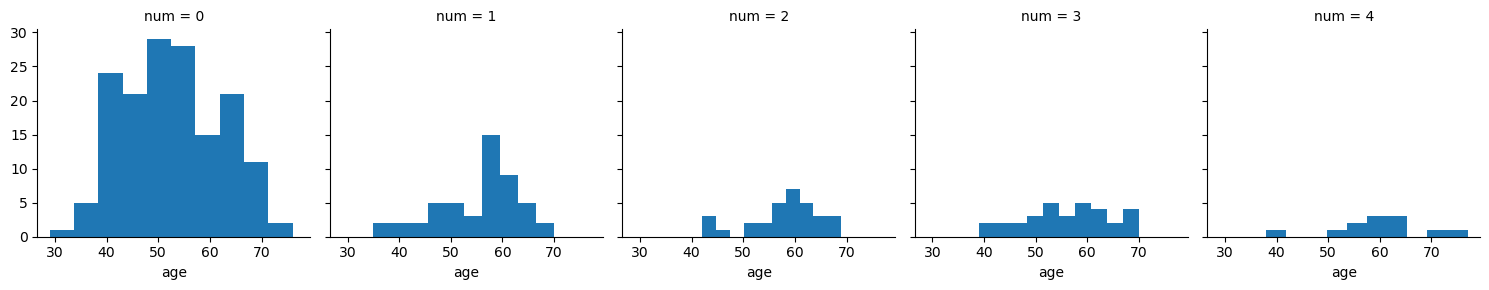

In [25]:
g = sns.FacetGrid(Heartdata_imputed, col='num')
g.map(plt.hist, 'age', bins=10)

Observation: 
1. Age > 35 is tend to have heart disease
2. Age group 55 - 60 is more suspected to have heart disease of category '1' 
3. Category 4 is very less frequent and is more found in the age group of 50 - 65 years of age
4. more people is suspected to have heart disease at 50-60 years of age

Correlating numerical and ordinal features
We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

Observations.

Pclass=3 had most passengers, however most did not survive. Confirms our classifying assumption #2.
Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further qualifies our classifying assumption #2.
Most passengers in Pclass=1 survived. Confirms our classifying assumption #3.
Pclass varies in terms of Age distribution of passengers.
Decisions.

Consider Pclass for model training.

# Bivariate analysis

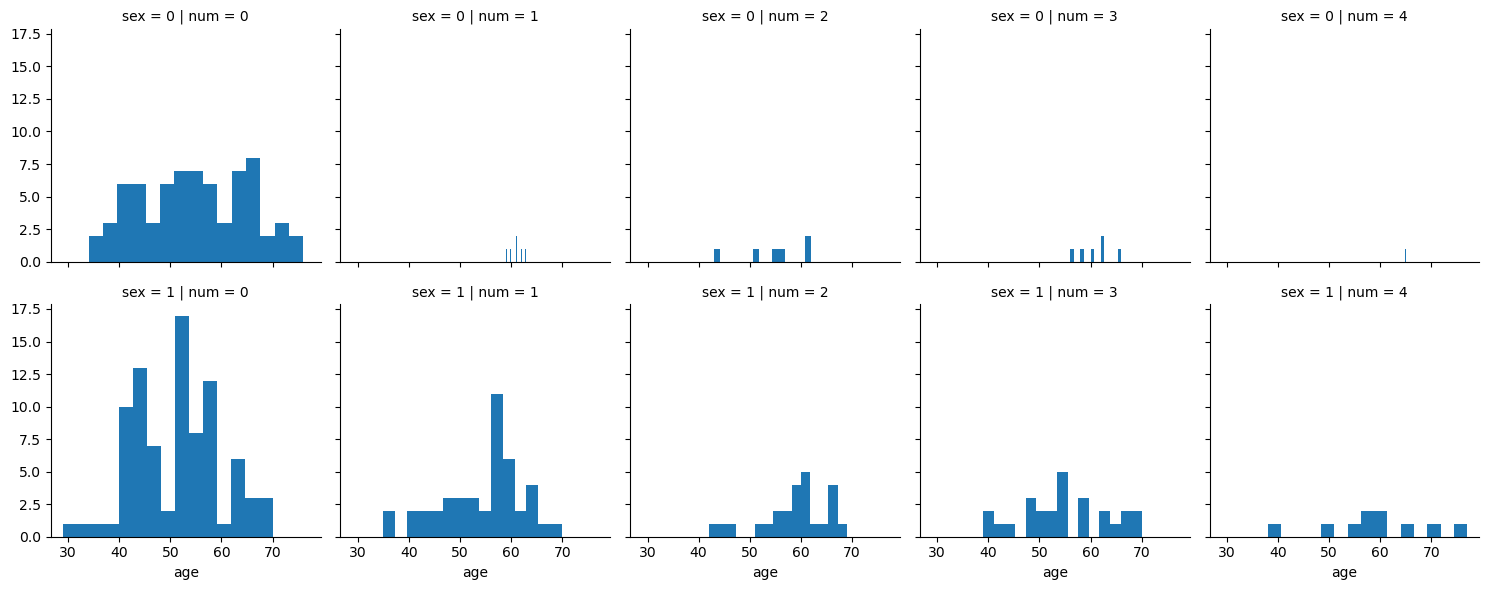

In [26]:
grid = sns.FacetGrid(Heartdata_imputed, col="num", row='sex')
grid.map(plt.hist, 'age', bins=15)
grid.add_legend()

Observation:
1. Sex '0' i.e., female are less susepted to heart disease and the high severity i.e., cat 4 is only for femalae of age ~65 yrs
2. Females are very less susceptable to hoeart diseases irrespective of their age, and most of the people in female were idetified at stage 2. 
3. No of people having stage '4' heart disease is very less in both the sex categories

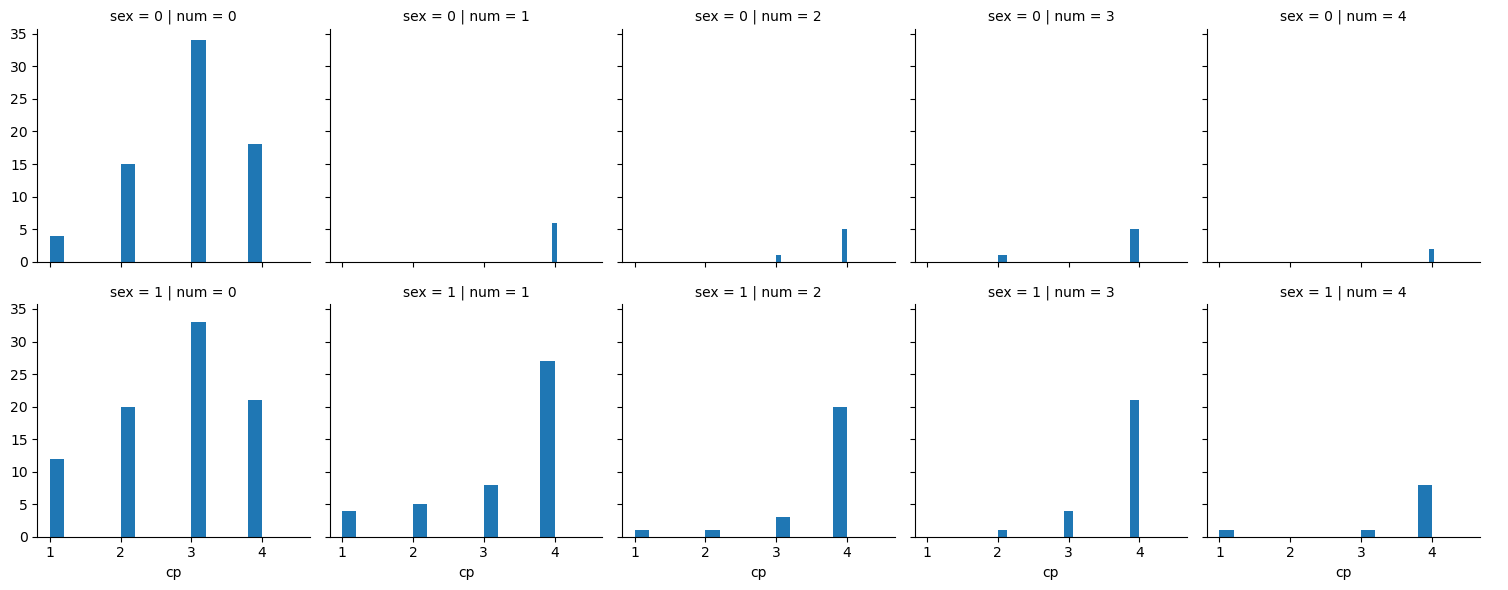

In [27]:
grid = sns.FacetGrid(Heartdata_imputed, col="num", row='sex')
grid.map(plt.hist, 'cp', bins=15)
grid.add_legend()

Observation:
1. Cp category '4' is directly proportional to the heart diseases

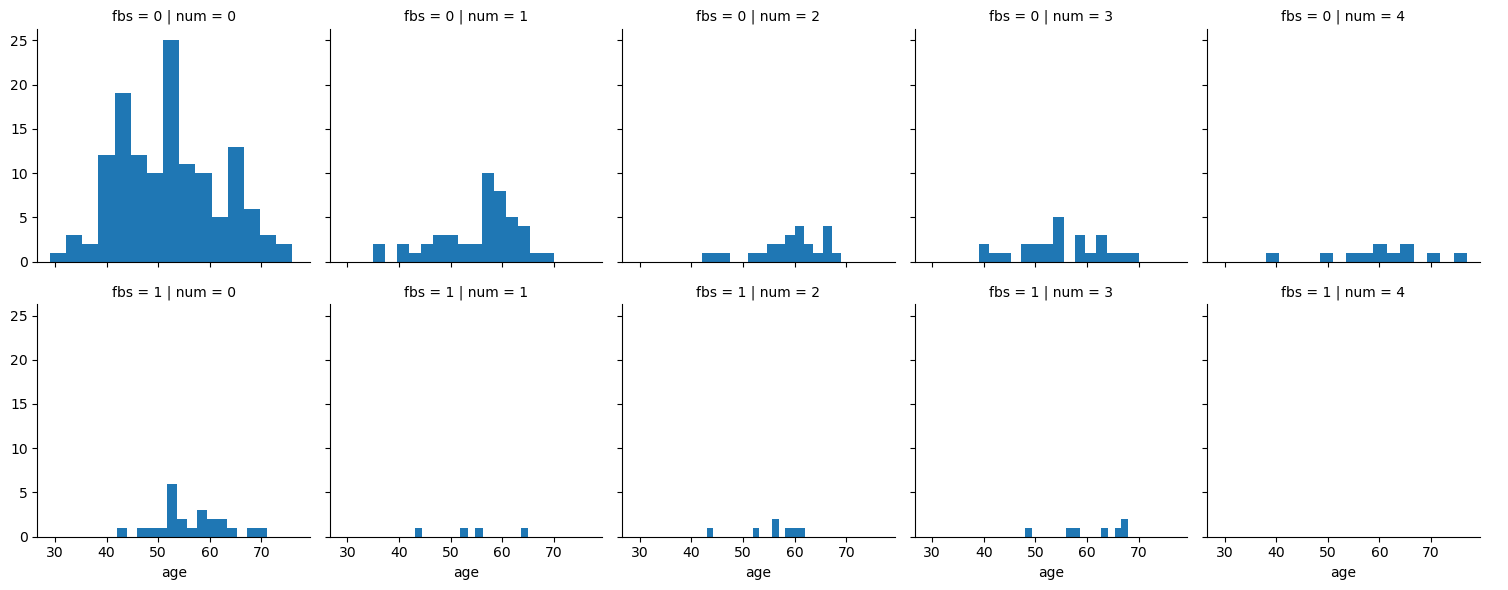

In [28]:
grid = sns.FacetGrid(Heartdata_imputed, col="num", row='fbs')
grid.map(plt.hist, 'age', bins=15)
grid.add_legend()

As we have 13 variables, doing univariate analysis and bivariate analysis manually is tediuous. 

we planned to do EDA using for loops 

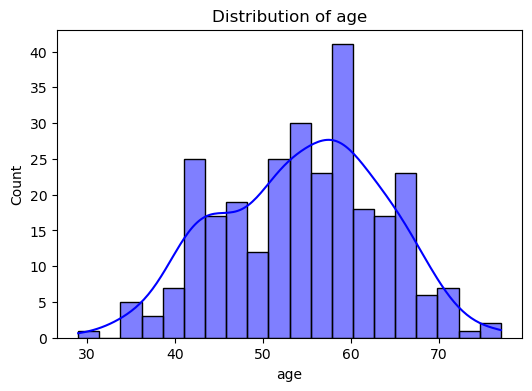

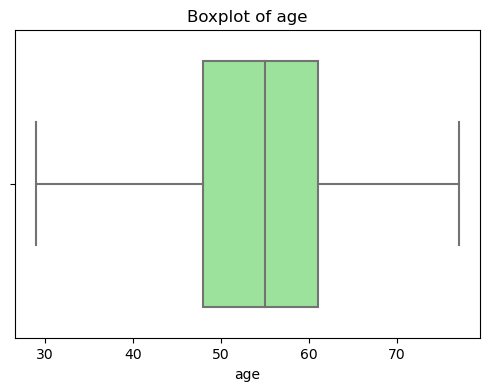

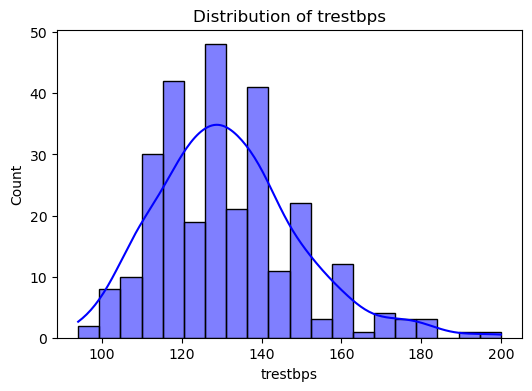

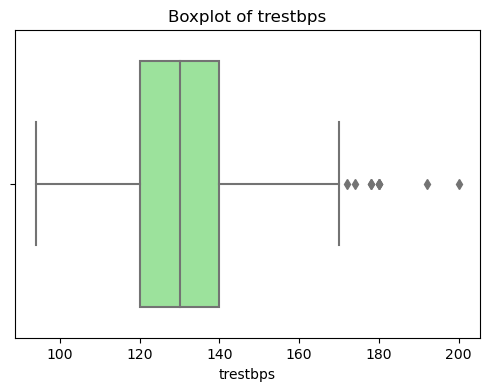

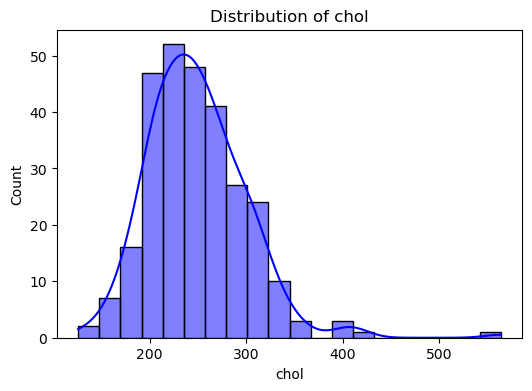

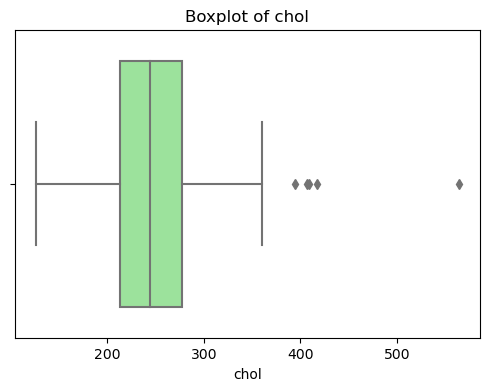

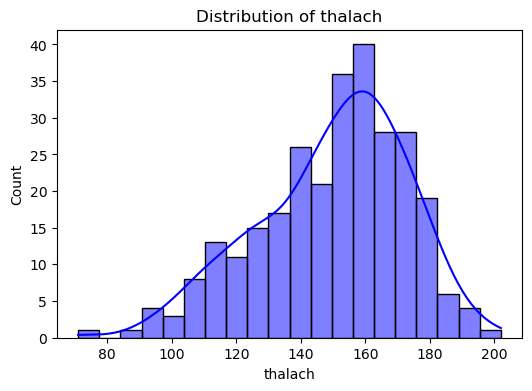

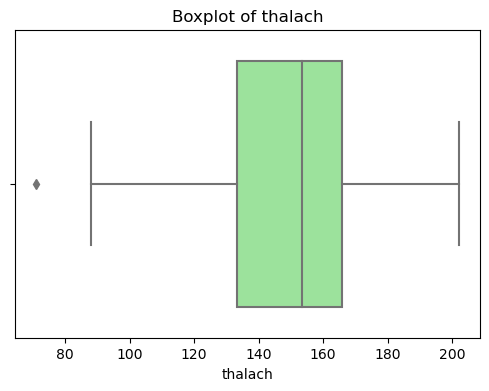

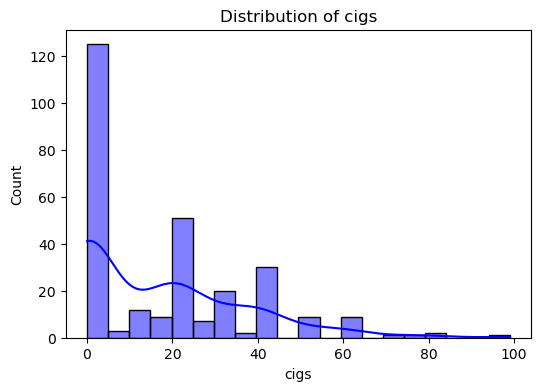

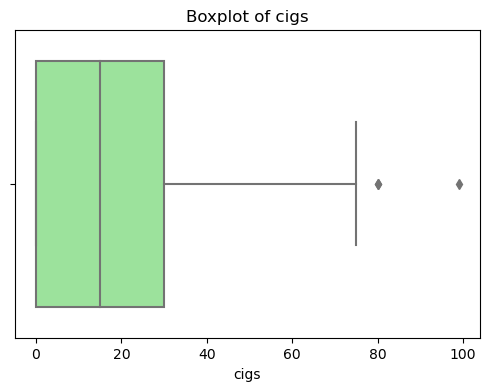

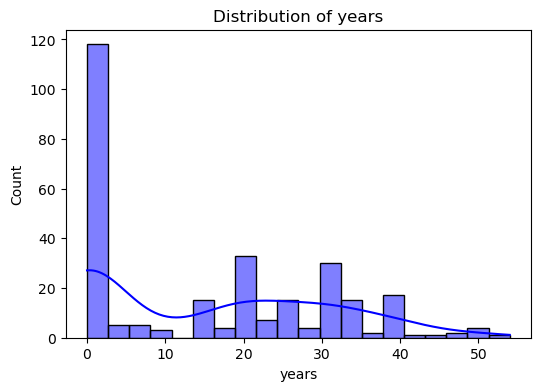

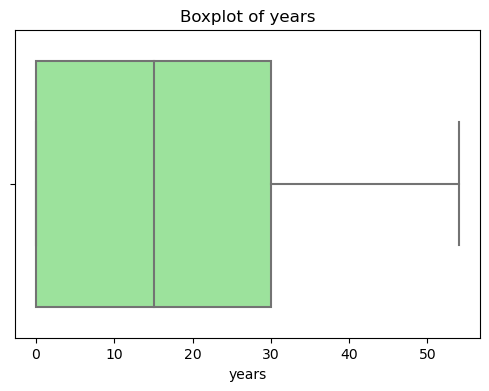

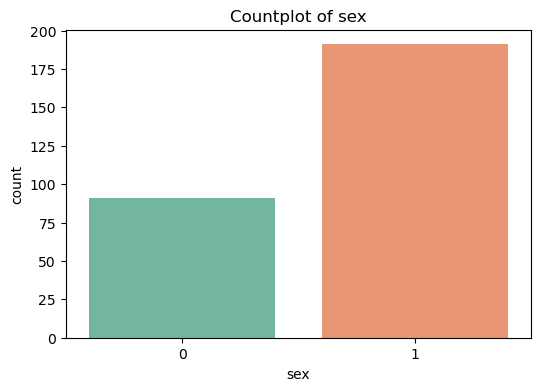

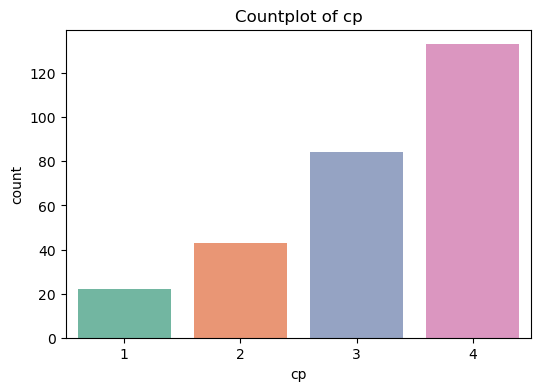

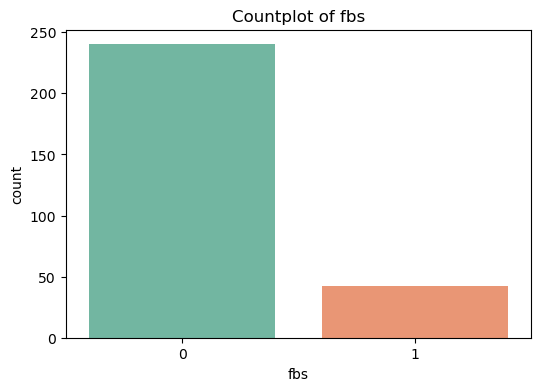

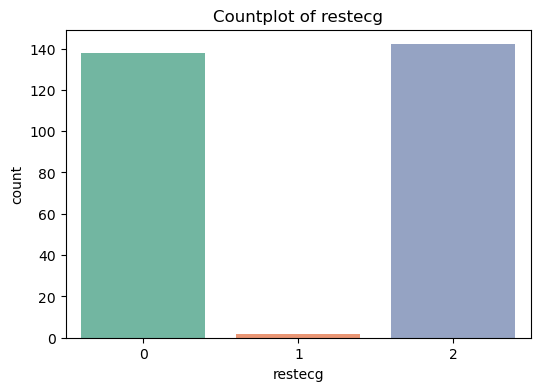

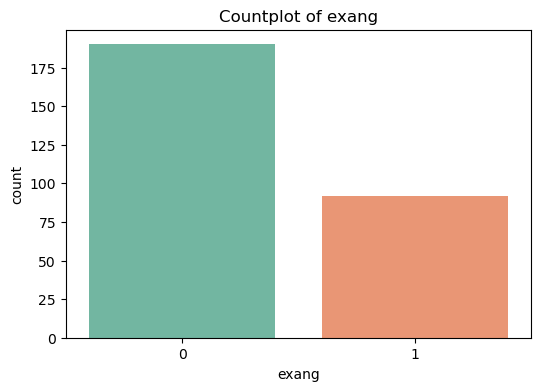

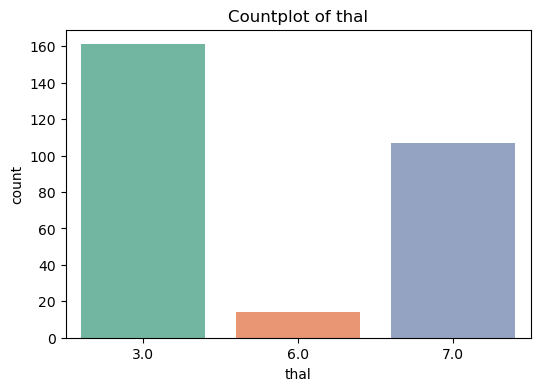

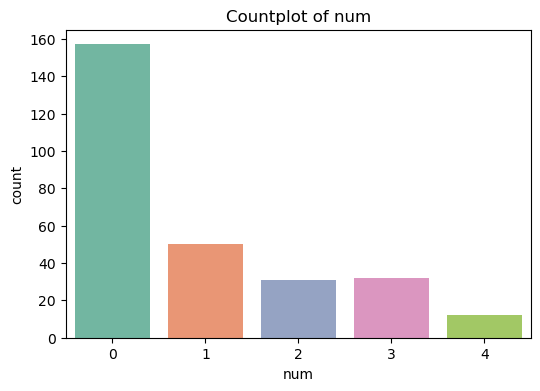

In [29]:
# 1. Univariate Analysis for Numerical Features (Histograms, Boxplots)
for feature in numerical_columns:
    # Plot Histogram
    plt.figure(figsize=(6, 4))
    sns.histplot(Heartdata_imputed[feature], bins=20, kde=True, color='blue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.show()

    # Plot Boxplot (to check for outliers)
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=Heartdata_imputed[feature], color='lightgreen')
    plt.title(f'Boxplot of {feature}')
    plt.show()

# 2. Univariate Analysis for Categorical Features (Bar plots)
for feature in categorical_columns:
    # Plot Countplot for categorical variables
    plt.figure(figsize=(6, 4))
    sns.countplot(x=Heartdata_imputed[feature], palette='Set2')
    plt.title(f'Countplot of {feature}')
    plt.show()

The univariate analysis provides the distribution of data, from this analysis it is found that we have categorical varables is that are not equally distributed particularly fbps, restcg, thal


In case of numerical values, the features like chol, cigs and years are not normally distributed and they have skewness. features such as trestbps, chol and cigs have skewness and outliers


# Bivariatae analysis

Correlation between age and num: 0.21074744929822115


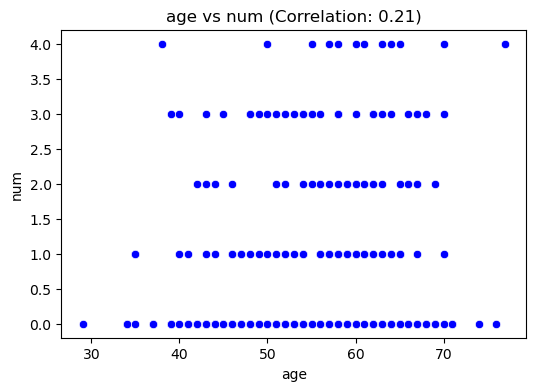

Correlation between trestbps and num: 0.15177561187232605


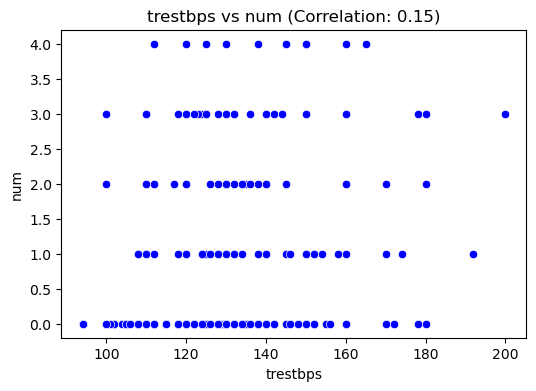

Correlation between chol and num: 0.09889461552612591


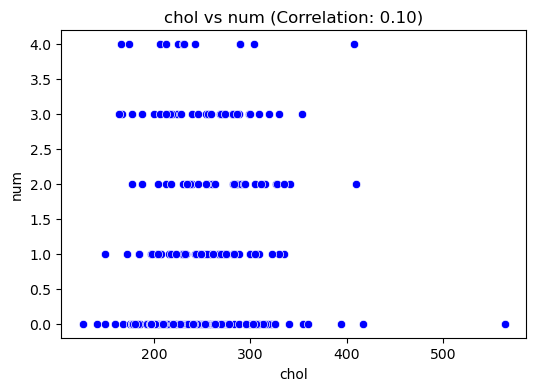

Correlation between thalach and num: -0.39619406563570253


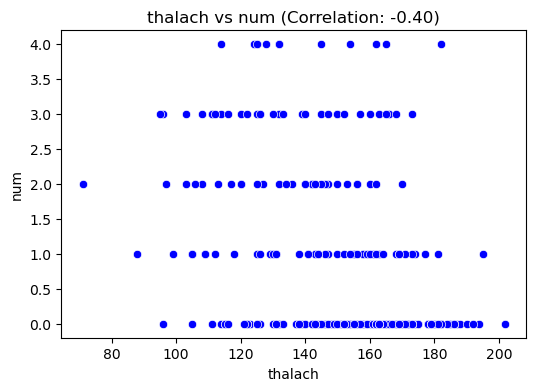

Correlation between cigs and num: 0.045190076063103275


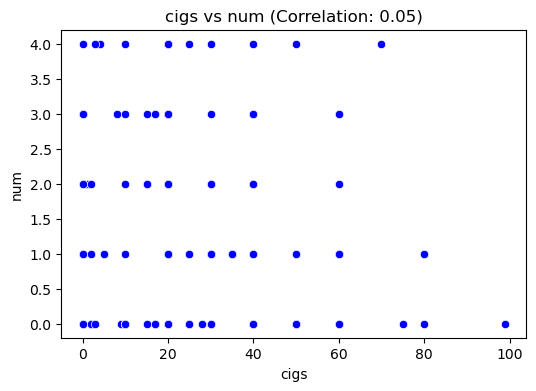

Correlation between years and num: 0.07649693537254912


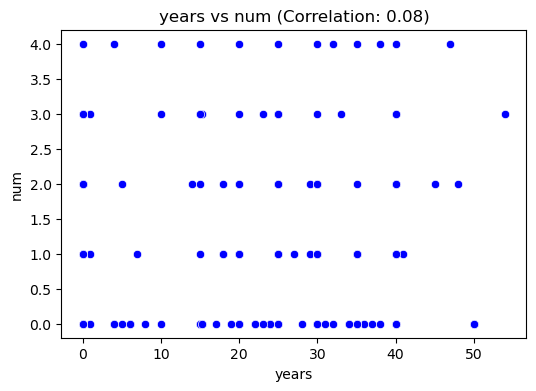


Chi-Square Test for sex vs num:
Chi2 Value: 27.830223266428572, p-Value: 1.3501135963055337e-05
sex is significantly related to num


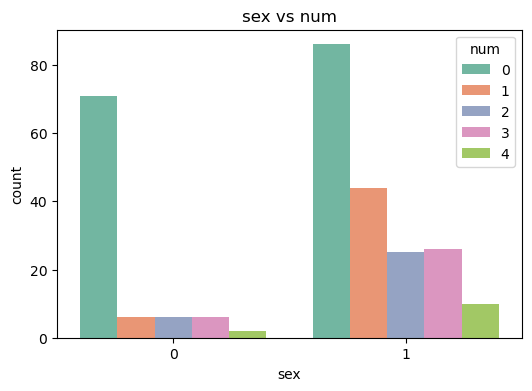


Chi-Square Test for cp vs num:
Chi2 Value: 75.87181563970846, p-Value: 2.5131880684120654e-11
cp is significantly related to num


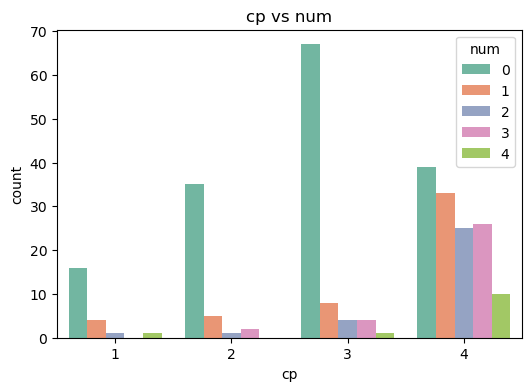


Chi-Square Test for fbs vs num:
Chi2 Value: 4.965012281754186, p-Value: 0.29090633081714984
fbs is NOT significantly related to num


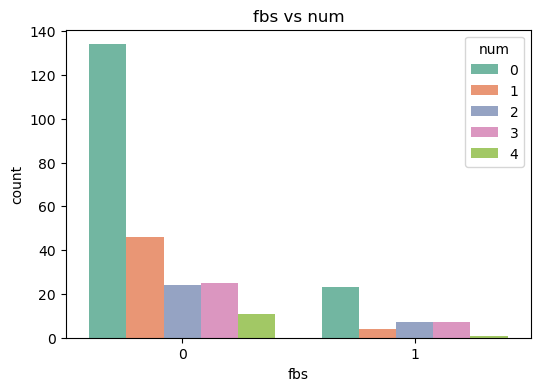


Chi-Square Test for restecg vs num:
Chi2 Value: 17.17786057171381, p-Value: 0.02830940752889477
restecg is significantly related to num


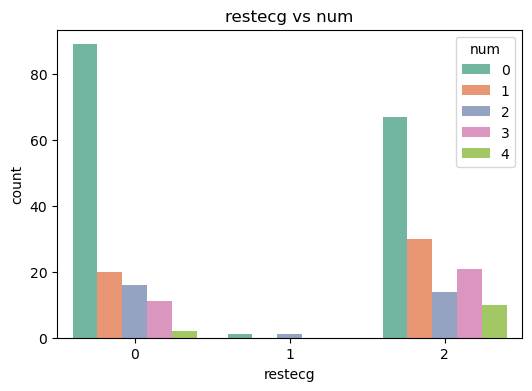


Chi-Square Test for exang vs num:
Chi2 Value: 56.238452199384625, p-Value: 1.7871256909089103e-11
exang is significantly related to num


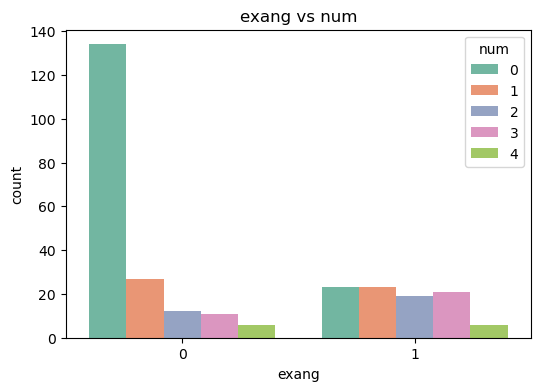


Chi-Square Test for thal vs num:
Chi2 Value: 86.75032485141509, p-Value: 2.1200494502931083e-15
thal is significantly related to num


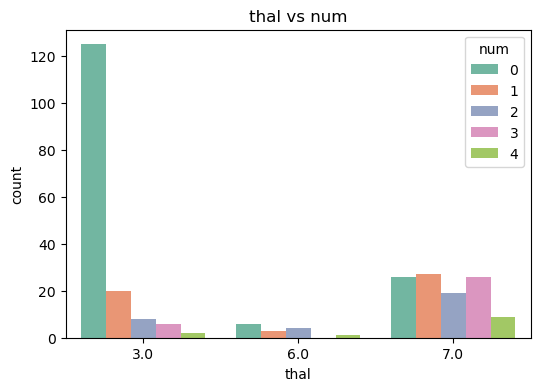

In [30]:
from scipy.stats import chi2_contingency

# Explicitly define categorical and numerical columns
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'thal']  
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'cigs', 'years'] 
target_column = 'num'


# Numerical vs Target (Correlation)
for num_feature in numerical_columns:
    # Calculate the correlation between numerical feature and target
    correlation = Heartdata_imputed[[num_feature, target_column]].corr().iloc[0, 1]
    print(f'Correlation between {num_feature} and {target_column}: {correlation}')
    
    # Visualize the relationship using scatterplot and correlation
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=Heartdata_imputed[num_feature], y=Heartdata_imputed[target_column], color='blue')
    plt.title(f'{num_feature} vs {target_column} (Correlation: {correlation:.2f})')
    plt.show()


# Categorical vs Target (Chi-Square Test / Visualizations)
for cat_feature in categorical_columns:
    if cat_feature != target_column:  # Avoid checking target column vs itself
        # Perform Chi-Square test for independence (for categorical features)
        contingency_table = pd.crosstab(Heartdata_imputed[cat_feature], Heartdata_imputed[target_column])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        
        print(f'\nChi-Square Test for {cat_feature} vs {target_column}:')
        print(f'Chi2 Value: {chi2}, p-Value: {p}')
        
        # If p-value < 0.05, we can conclude that the feature is significantly related to the target
        if p < 0.05:
            print(f'{cat_feature} is significantly related to {target_column}')
        else:
            print(f'{cat_feature} is NOT significantly related to {target_column}')
        
        # Visualize using countplot or boxplot
        plt.figure(figsize=(6, 4))
        sns.countplot(x=cat_feature, hue=target_column, data=Heartdata_imputed, palette='Set2')
        plt.title(f'{cat_feature} vs {target_column}')
        plt.show()


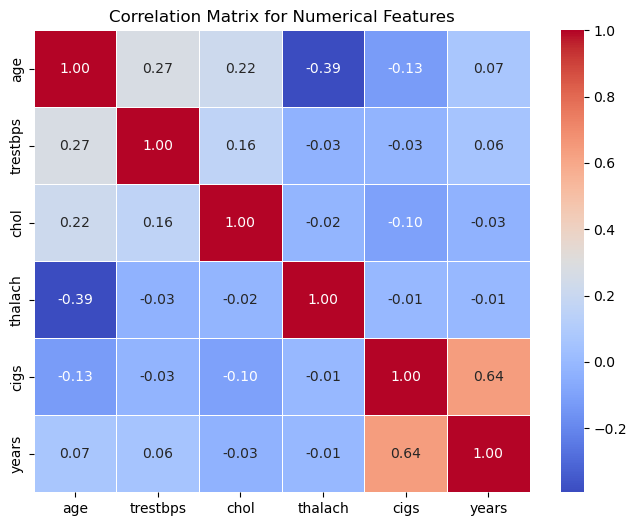


Highly Correlated Pairs (Threshold > 0.9):

Remaining Features after Dropping Highly Correlated Ones:
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'cigs', 'years', 'fbs',
       'famhist', 'restecg', 'thalach', 'exang', 'thal', 'num'],
      dtype='object')


In [31]:
# Bivariate analysis to remove highly correlated input variables
# Correlation Analysis of Input Features (Numerical vs Numerical)

# Calculate Pearson correlation matrix for numerical features
correlation_matrix = Heartdata_imputed[numerical_columns].corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Features')
plt.show()

# Identify highly correlated features (threshold > 0.9)
correlation_threshold = 0.9
highly_correlated = []
for i in range(len(numerical_columns)):
    for j in range(i + 1, len(numerical_columns)):
        feature1 = numerical_columns[i]
        feature2 = numerical_columns[j]
        if abs(correlation_matrix.loc[feature1, feature2]) > correlation_threshold:
            highly_correlated.append((feature1, feature2))

print(f'\nHighly Correlated Pairs (Threshold > {correlation_threshold}):')
for pair in highly_correlated:
    print(f'{pair[0]} and {pair[1]}')

# Optionally, drop one feature from highly correlated pairs (for reducing multicollinearity)
# For example, we can remove the first feature in each highly correlated pair:
for feature1, feature2 in highly_correlated:
    print(f'Dropping {feature1} due to high correlation with {feature2}')
    Heartdata_imputed.drop(columns=[feature1], inplace=True)

# Check the remaining columns after dropping highly correlated features
print("\nRemaining Features after Dropping Highly Correlated Ones:")
print(Heartdata_imputed.columns)

Observation: Clearly none of the input features are highly correlated thus they can be used as it is. 

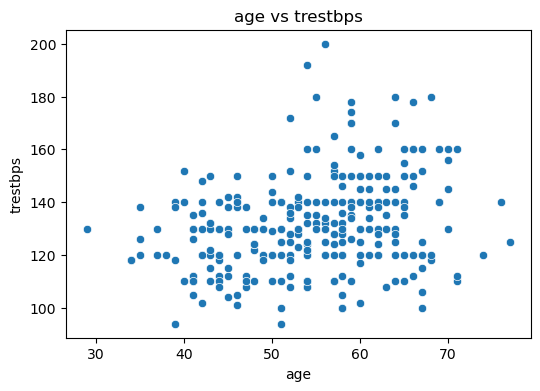

Correlation between age and trestbps:
               age  trestbps
age       1.000000  0.274466
trestbps  0.274466  1.000000


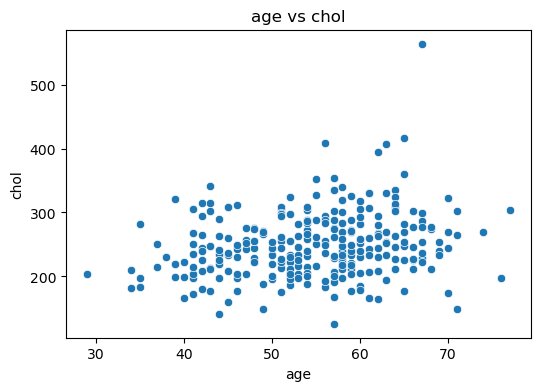

Correlation between age and chol:
           age      chol
age   1.000000  0.218295
chol  0.218295  1.000000


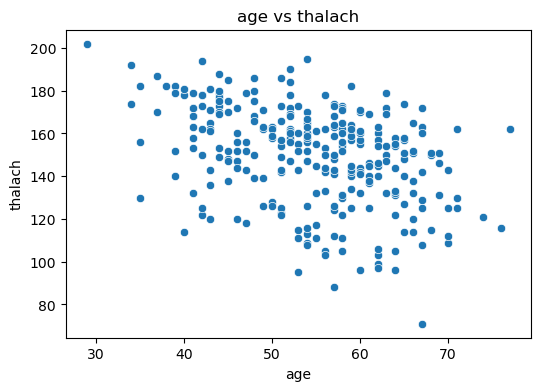

Correlation between age and thalach:
              age   thalach
age      1.000000 -0.393266
thalach -0.393266  1.000000


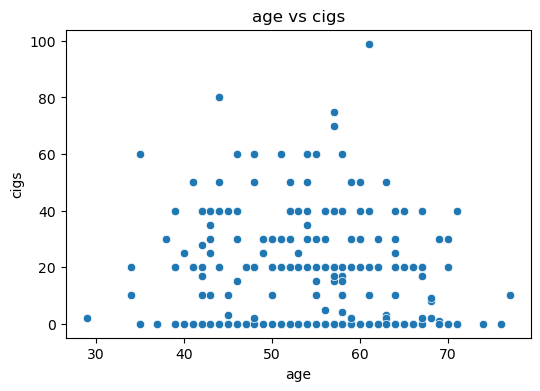

Correlation between age and cigs:
           age      cigs
age   1.000000 -0.125275
cigs -0.125275  1.000000


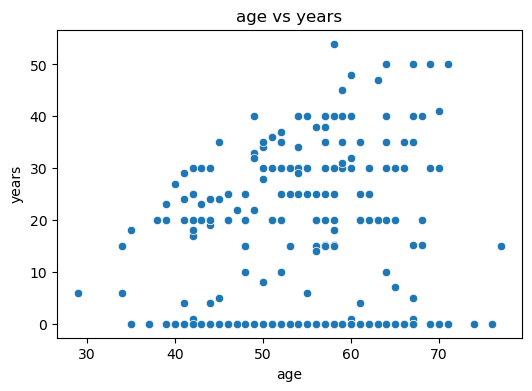

Correlation between age and years:
            age     years
age    1.000000  0.067795
years  0.067795  1.000000


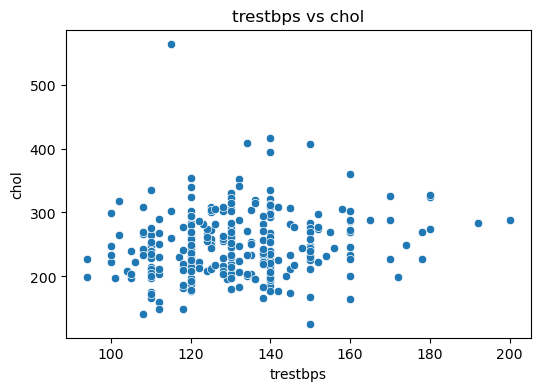

Correlation between trestbps and chol:
          trestbps      chol
trestbps  1.000000  0.157118
chol      0.157118  1.000000


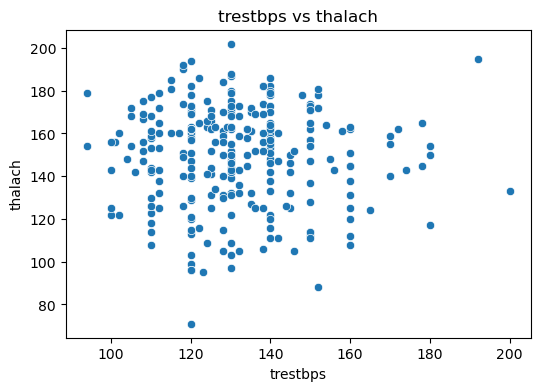

Correlation between trestbps and thalach:
          trestbps   thalach
trestbps  1.000000 -0.029739
thalach  -0.029739  1.000000


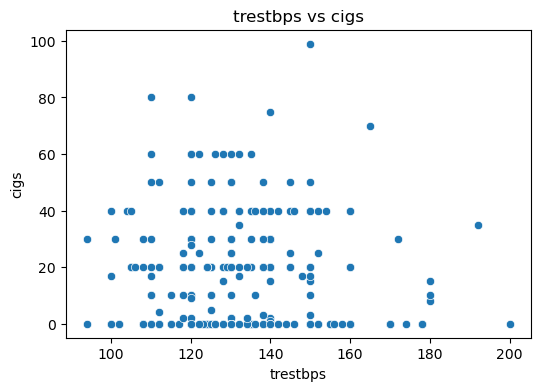

Correlation between trestbps and cigs:
          trestbps      cigs
trestbps  1.000000 -0.027706
cigs     -0.027706  1.000000


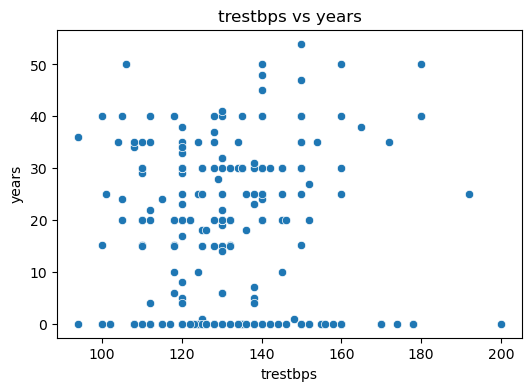

Correlation between trestbps and years:
          trestbps     years
trestbps  1.000000  0.057198
years     0.057198  1.000000


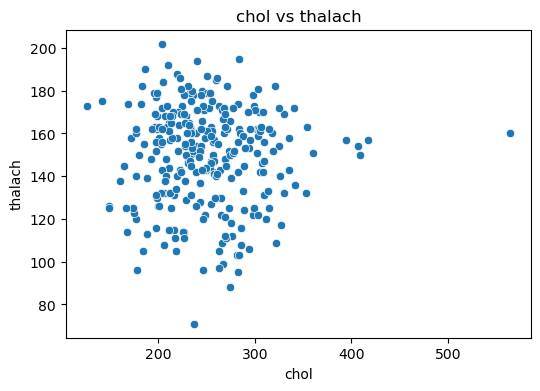

Correlation between chol and thalach:
             chol   thalach
chol     1.000000 -0.018392
thalach -0.018392  1.000000


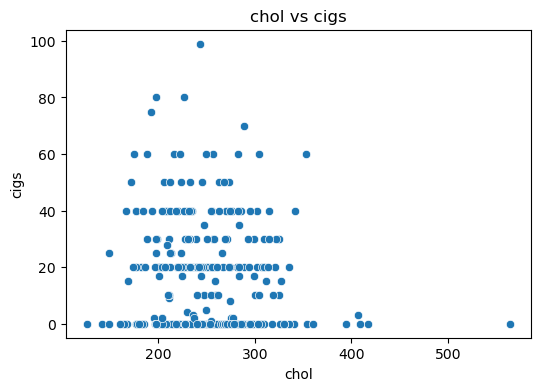

Correlation between chol and cigs:
          chol      cigs
chol  1.000000 -0.101691
cigs -0.101691  1.000000


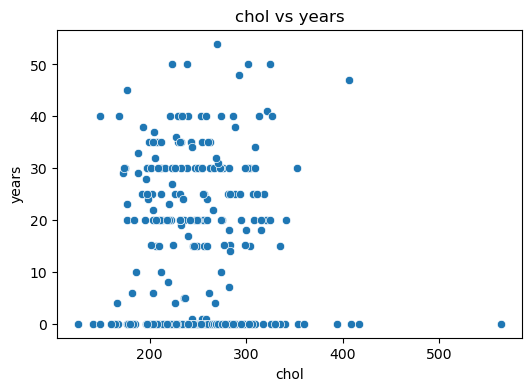

Correlation between chol and years:
           chol     years
chol   1.000000 -0.032904
years -0.032904  1.000000


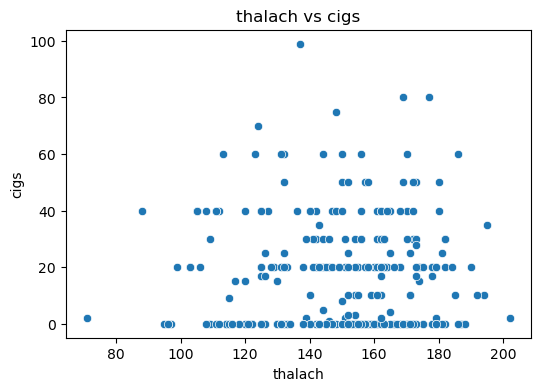

Correlation between thalach and cigs:
          thalach      cigs
thalach  1.000000 -0.005414
cigs    -0.005414  1.000000


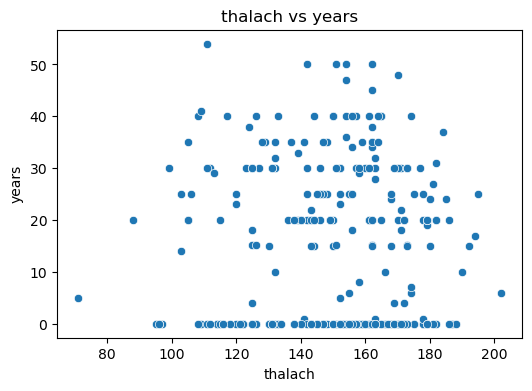

Correlation between thalach and years:
         thalach    years
thalach  1.00000 -0.00517
years   -0.00517  1.00000


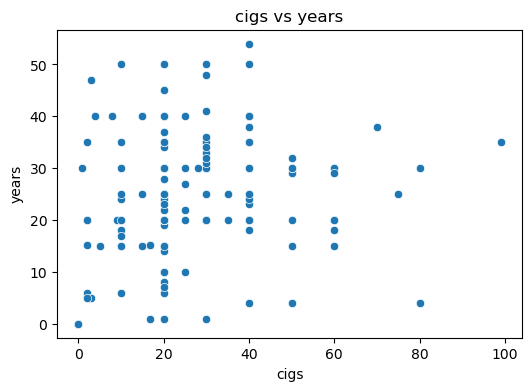

Correlation between cigs and years:
           cigs     years
cigs   1.000000  0.640183
years  0.640183  1.000000


In [32]:
# Bivariate Analysis: Numerical vs Numerical (using Scatter Plots, Regression, Correlation)
for i in range(len(numerical_columns)):
    for j in range(i + 1, len(numerical_columns)):
        feature1 = numerical_columns[i]
        feature2 = numerical_columns[j]

        # Scatter plot
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=Heartdata_imputed[feature1], y=Heartdata_imputed[feature2])
        plt.title(f'{feature1} vs {feature2}')
        plt.show()

        # Correlation
        correlation = Heartdata_imputed[[feature1, feature2]].corr()
        print(f'Correlation between {feature1} and {feature2}:')
        print(correlation)

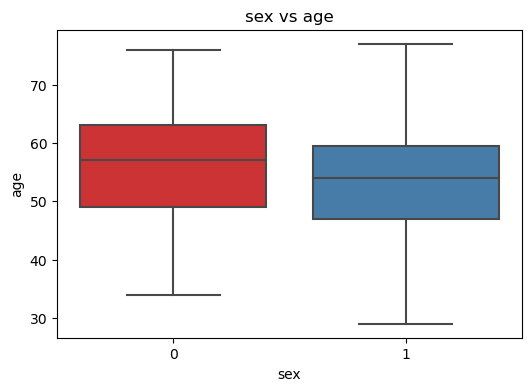

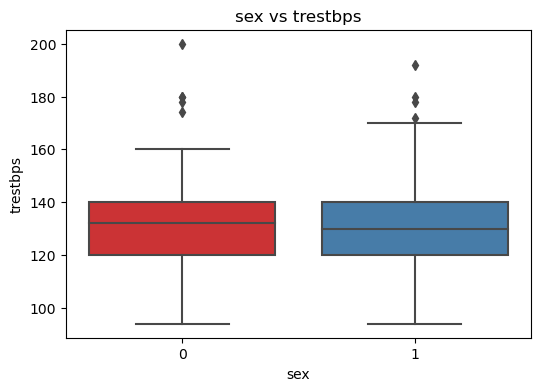

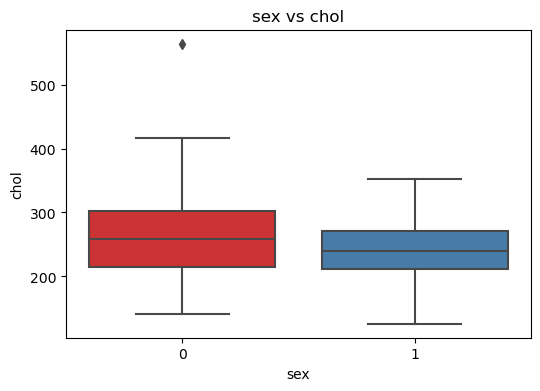

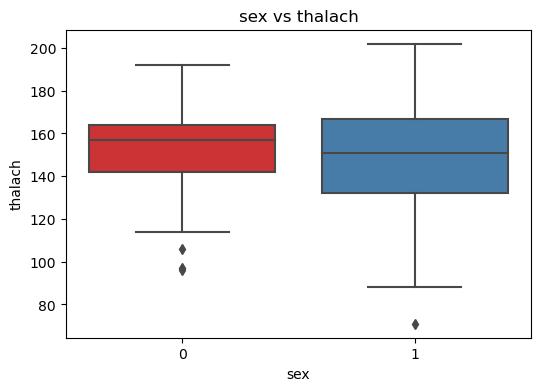

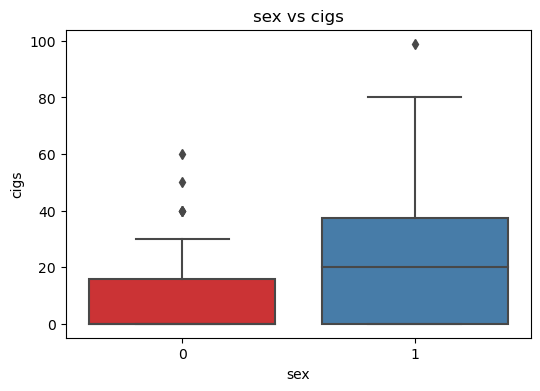

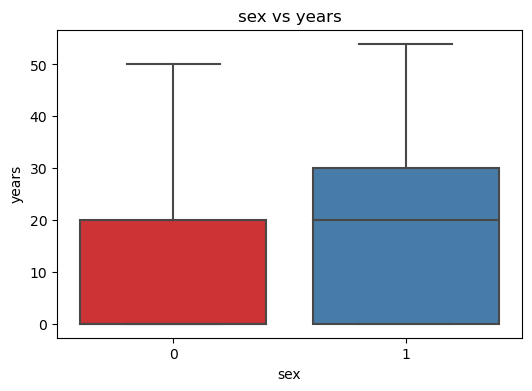

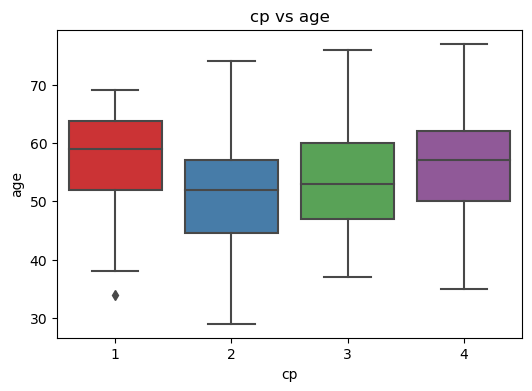

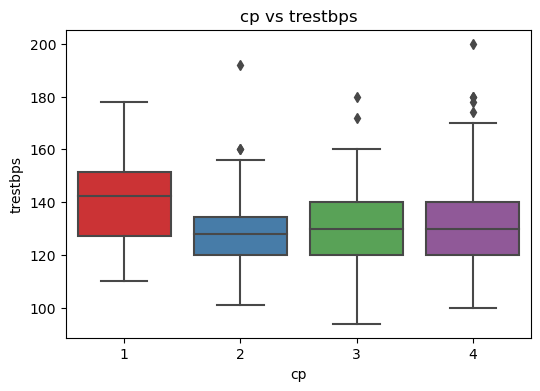

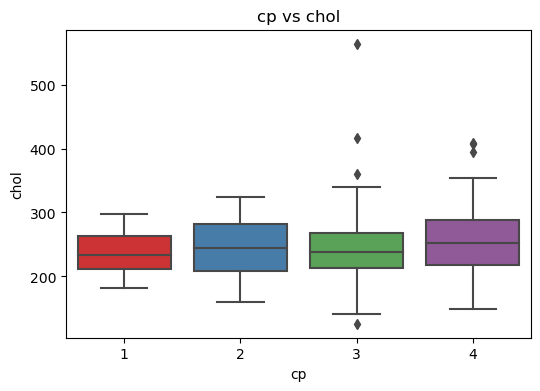

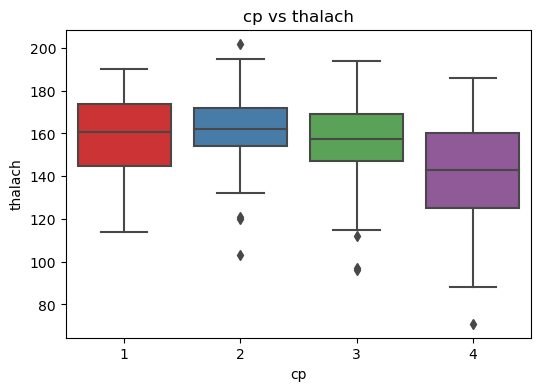

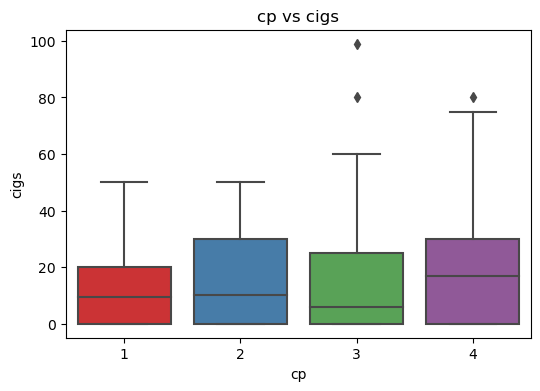

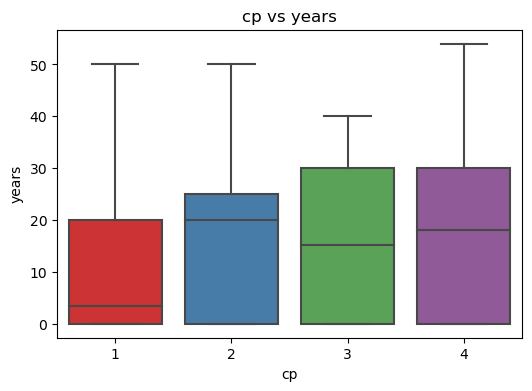

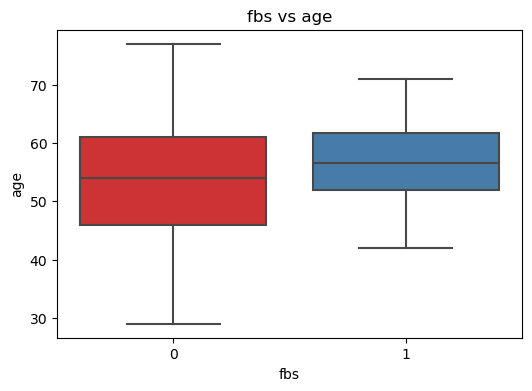

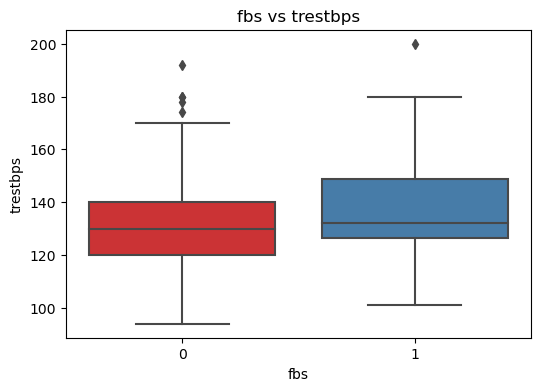

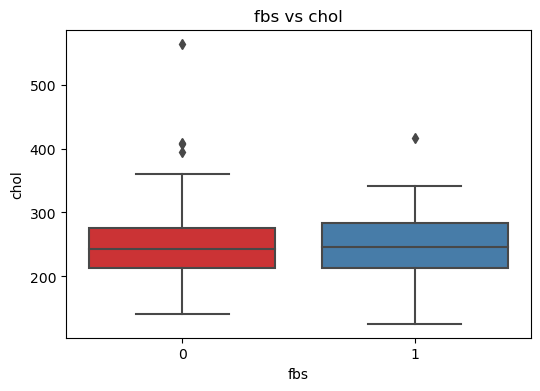

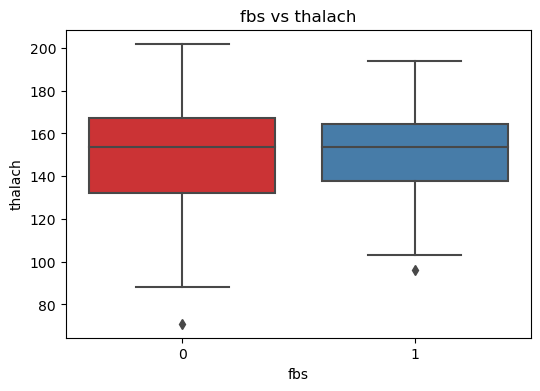

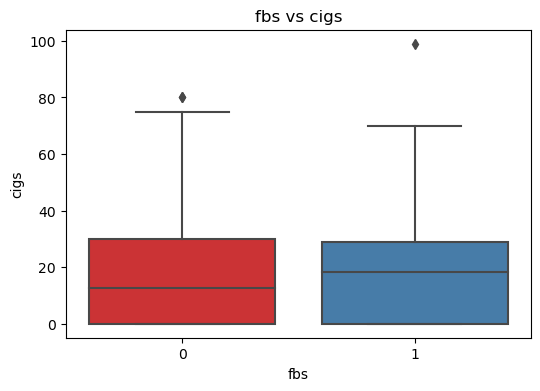

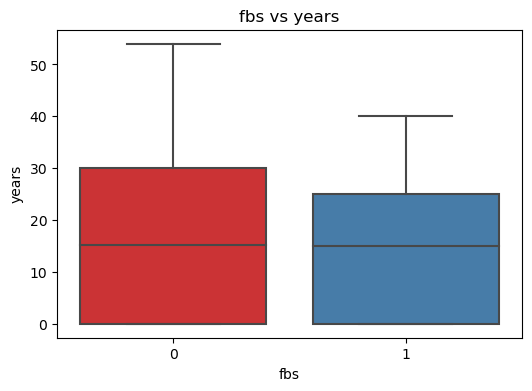

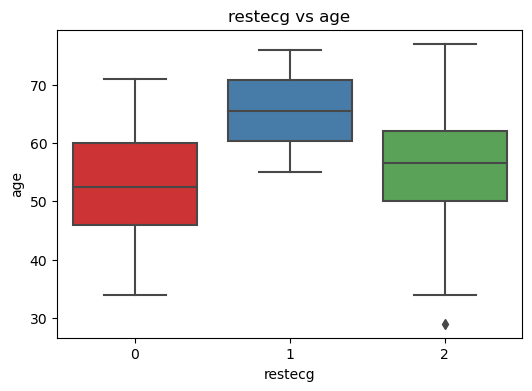

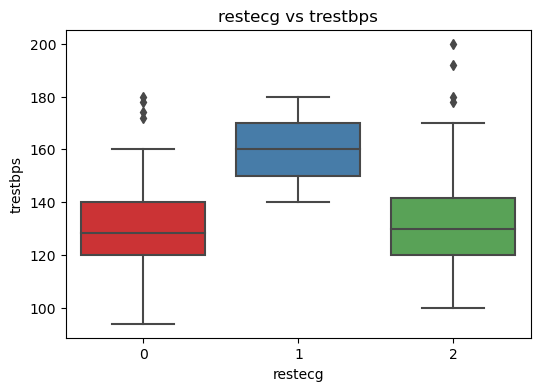

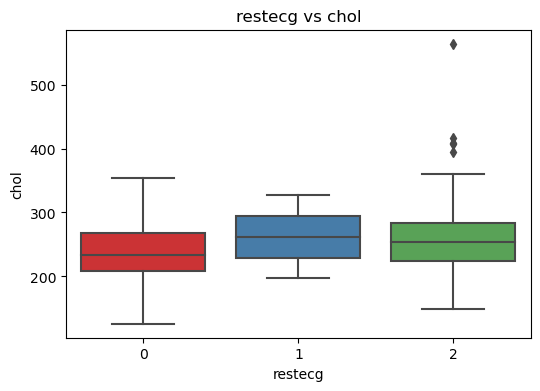

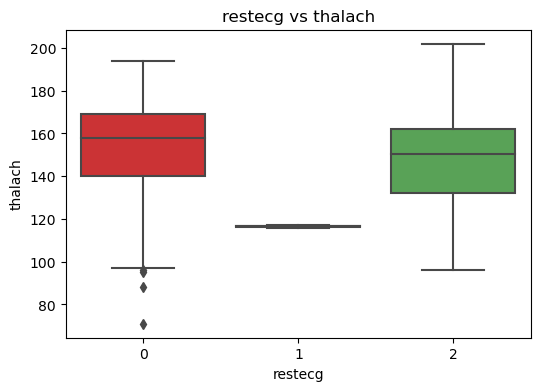

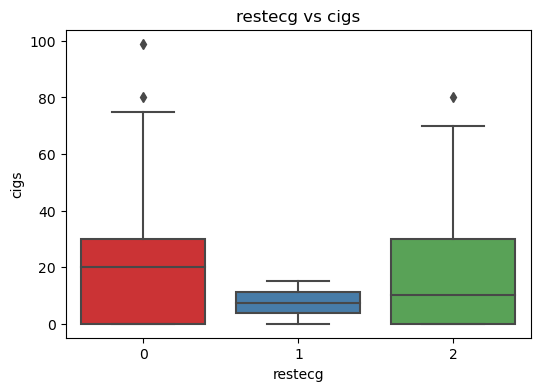

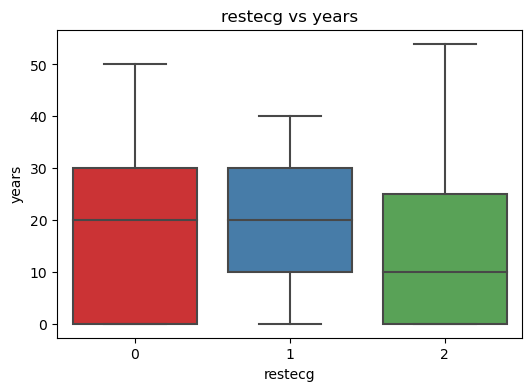

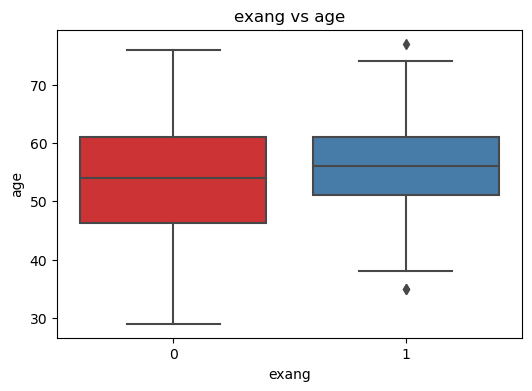

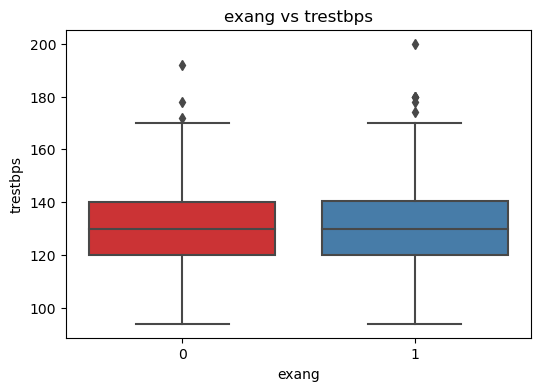

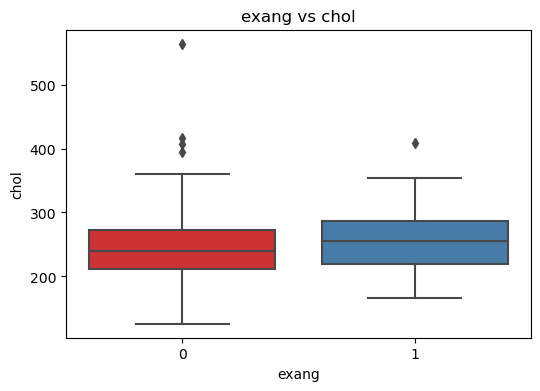

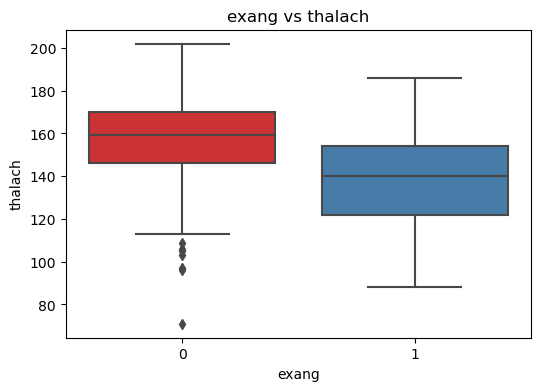

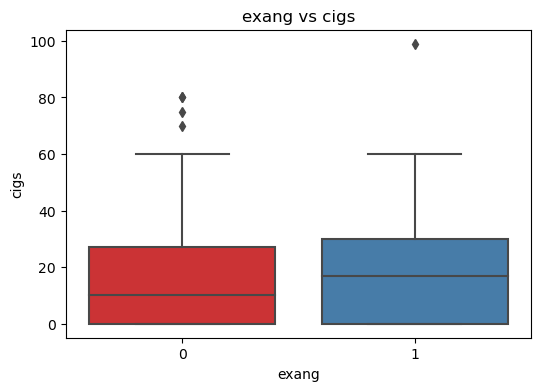

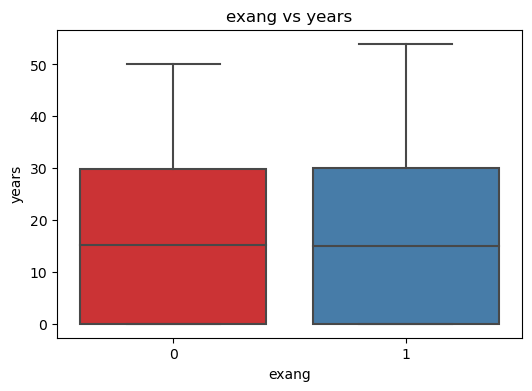

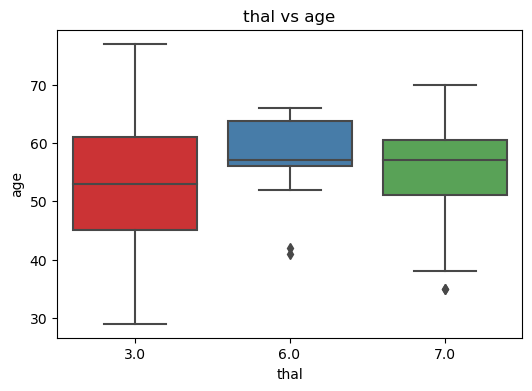

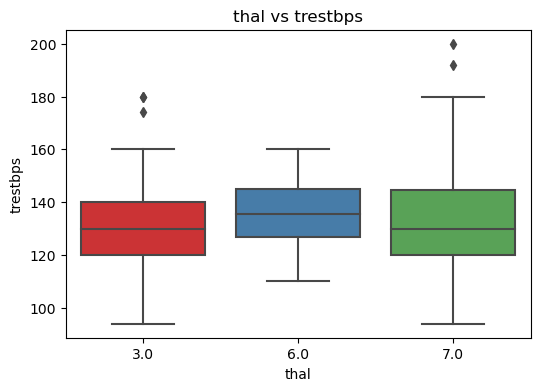

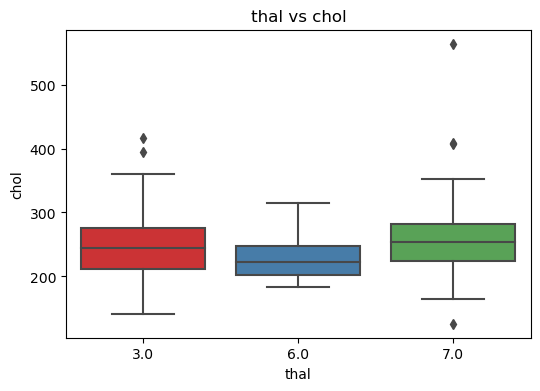

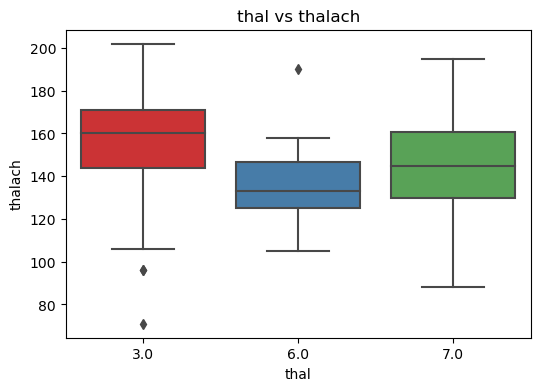

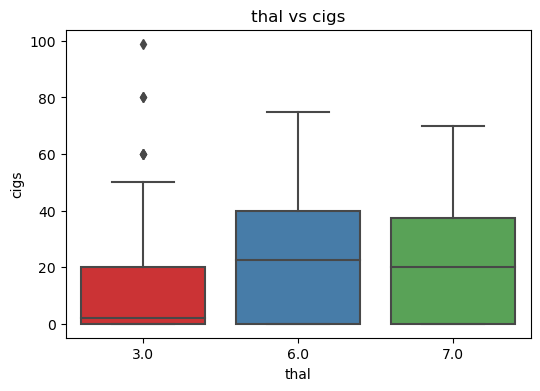

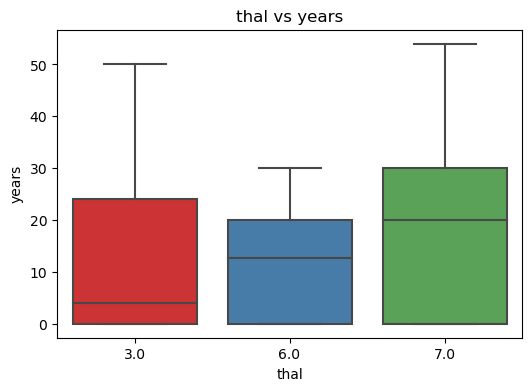

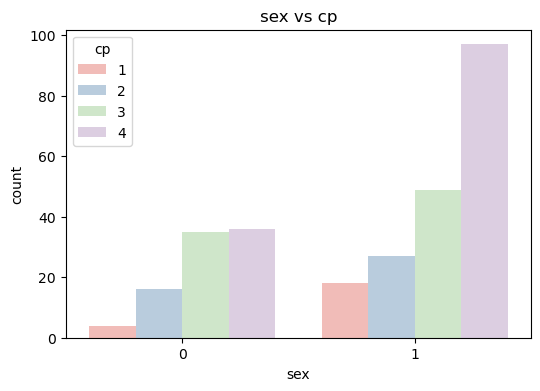

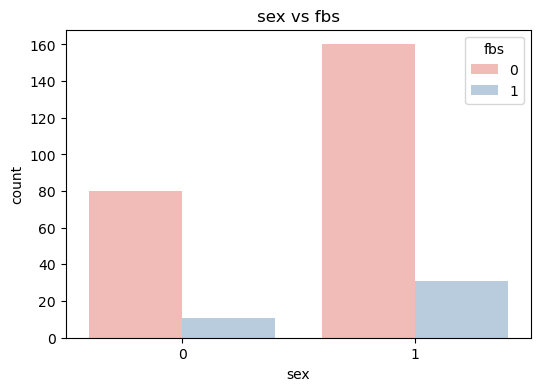

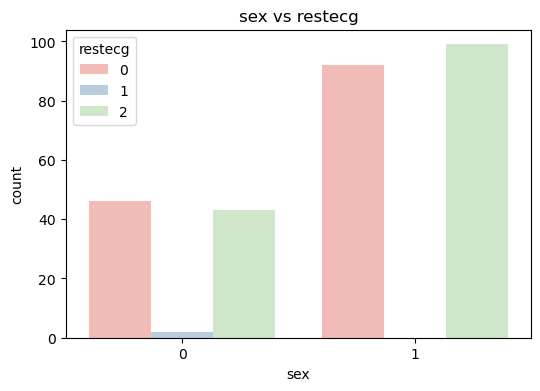

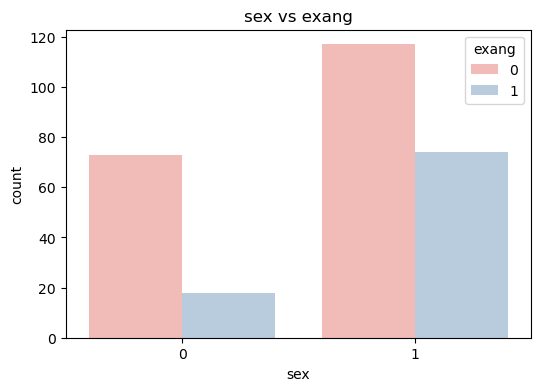

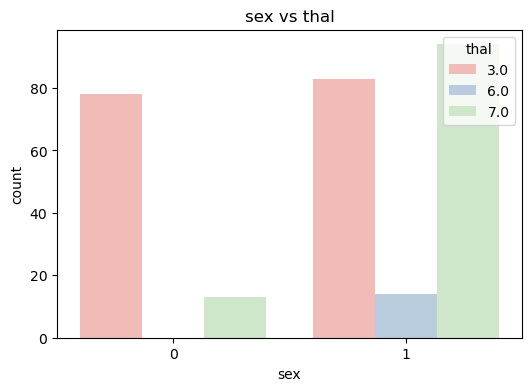

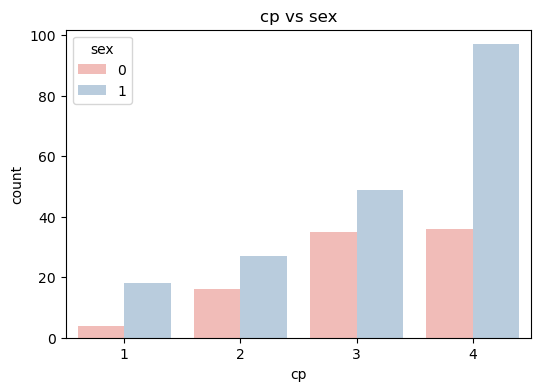

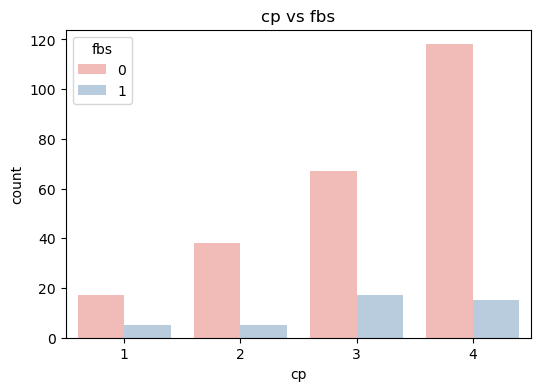

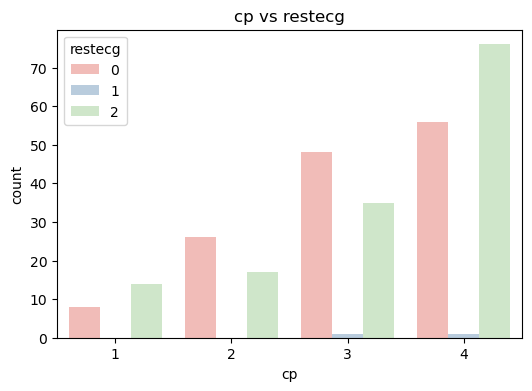

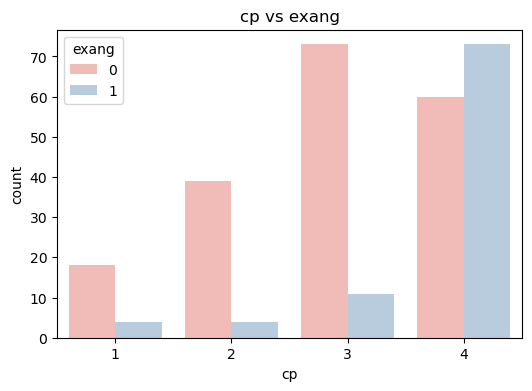

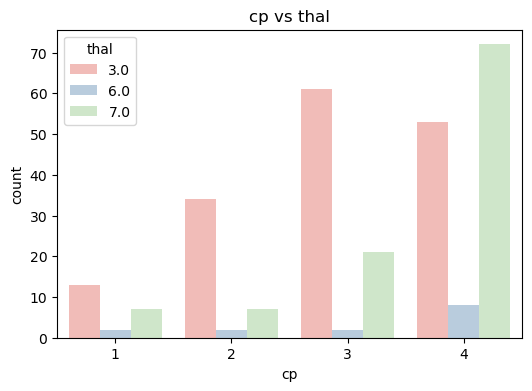

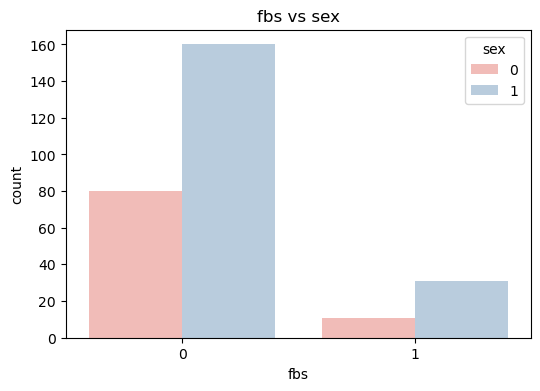

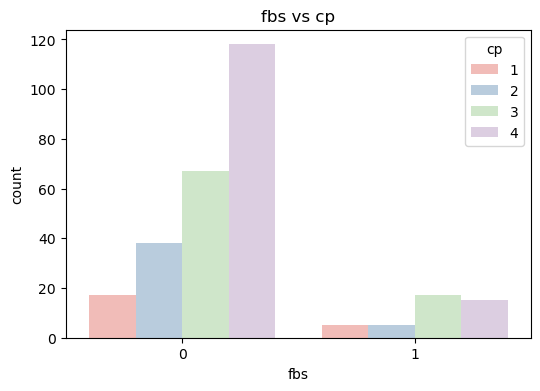

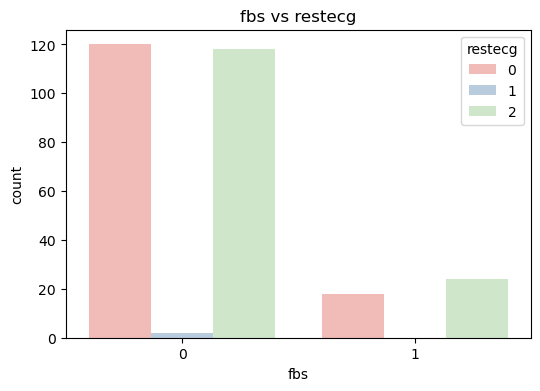

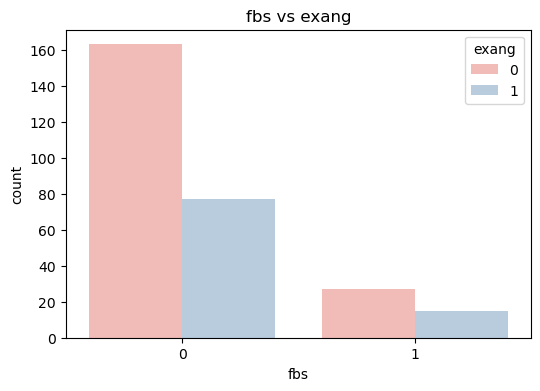

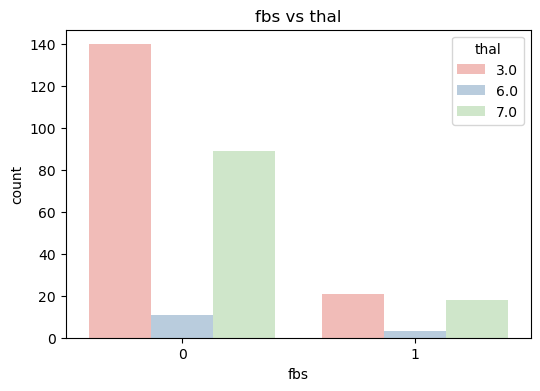

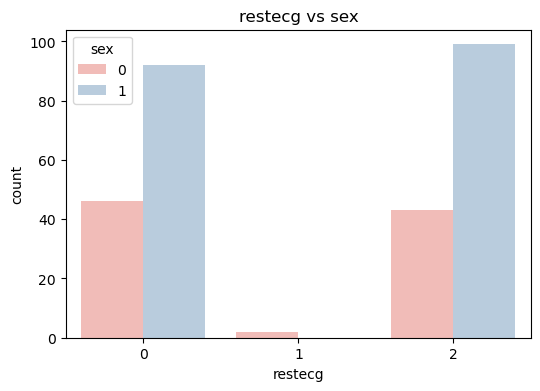

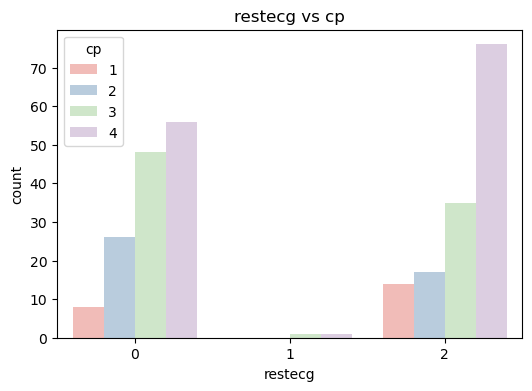

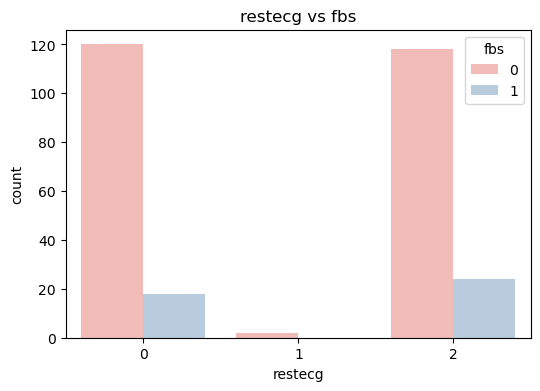

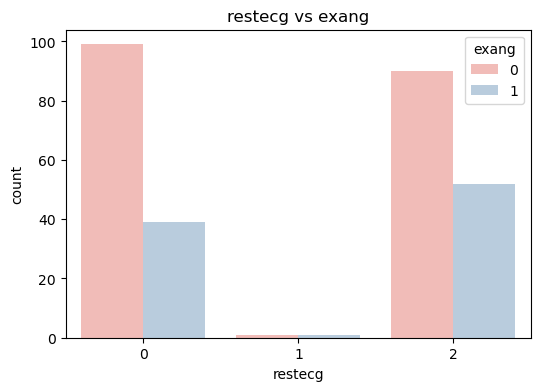

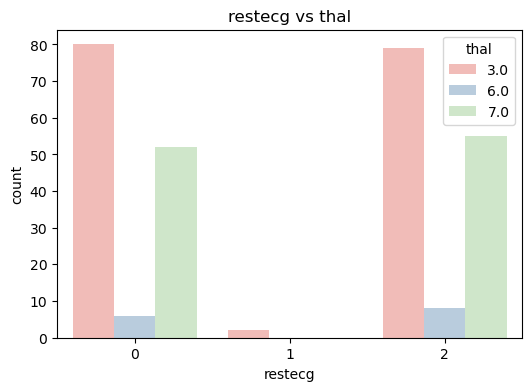

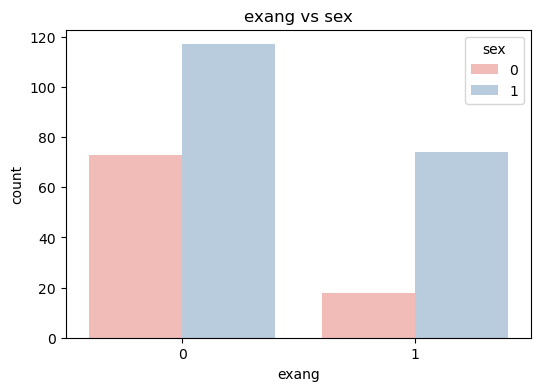

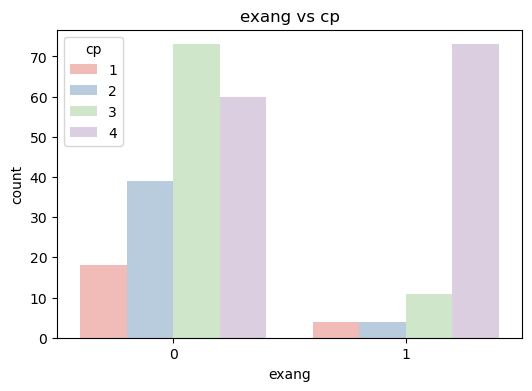

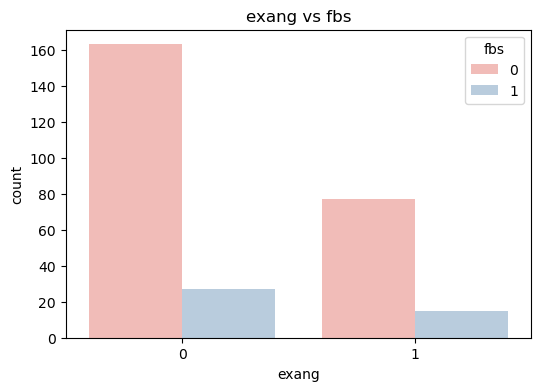

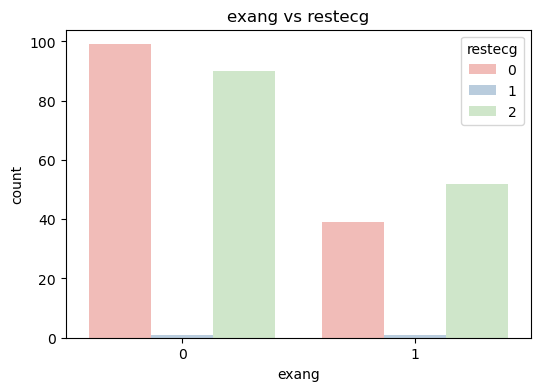

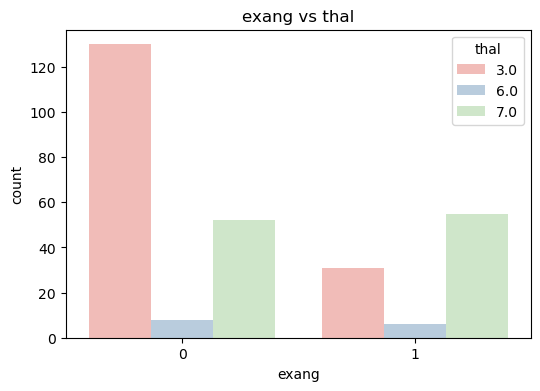

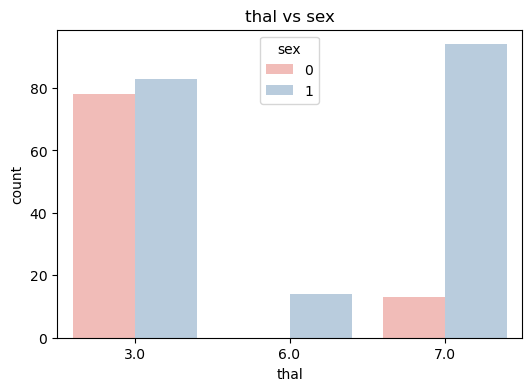

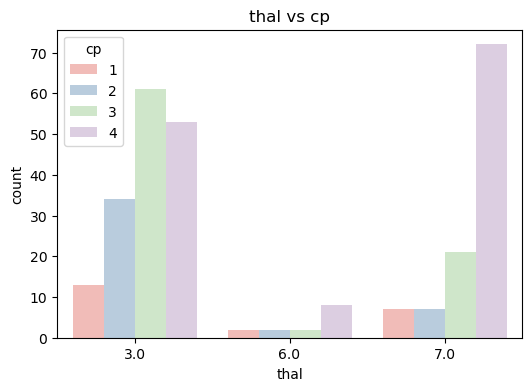

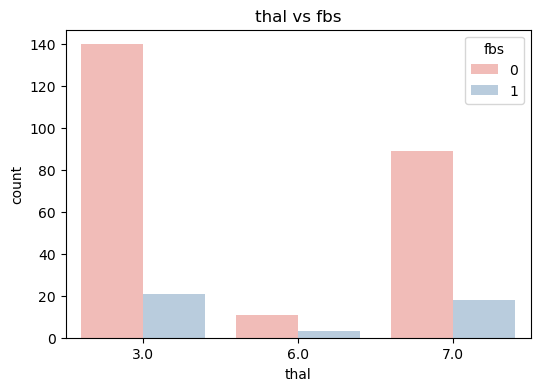

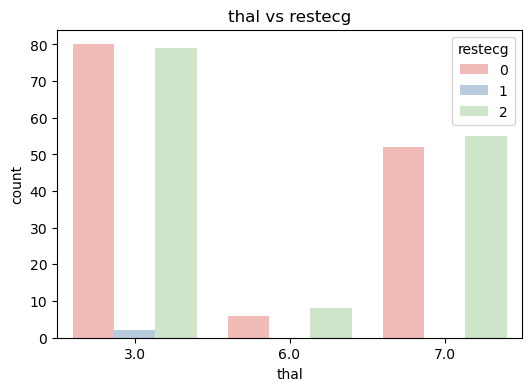

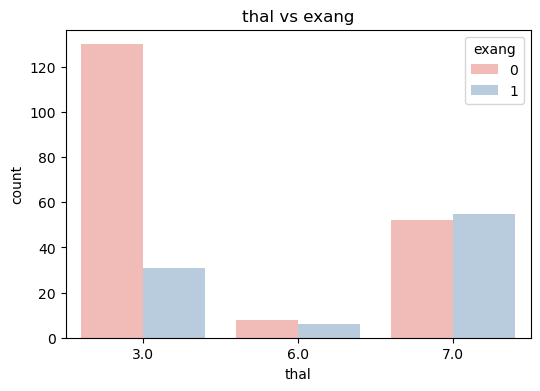

In [33]:

# 4. Bivariate Analysis: Categorical vs Numerical (using Boxplots, Pointplots)
for cat_feature in categorical_columns:
    for num_feature in numerical_columns:
        # Boxplot for Categorical vs Numerical 
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=Heartdata_imputed[cat_feature], y=Heartdata_imputed[num_feature], palette='Set1')
        plt.title(f'{cat_feature} vs {num_feature}')
        plt.show()


# 5. Bivariate Analysis: Categorical vs Categorical (using Bar Plots, Count Plots)
for cat_feature1 in categorical_columns:
    for cat_feature2 in categorical_columns:
        if cat_feature1 != cat_feature2:  # Avoid self-comparison
            # Bar plot (Countplot of the combination of two categorical features)
            plt.figure(figsize=(6, 4))
            sns.countplot(x=cat_feature1, hue=cat_feature2, data=Heartdata_imputed, palette='Pastel1')
            plt.title(f'{cat_feature1} vs {cat_feature2}')
            plt.show()



# feature engineering

As the cigs and years gives the information on exposure to smoking they can be combined to give the information on total smoking eposure. 

In [34]:
from sklearn.preprocessing import StandardScaler

# Assuming you already have your dataset loaded in `train_df`
# Let's first create the new feature 'smoking_exposure'
Heartdata_imputed['smoking_exposure'] = Heartdata_imputed['cigs'] * Heartdata_imputed['years'] * 365

# Now drop the original 'cigs' and 'years' columns
Heartdata_imputed = Heartdata_imputed.drop(['cigs', 'years'], axis=1)

In [35]:
Heartdata_imputed.head()

,age,sex,cp,trestbps,chol,fbs,famhist,restecg,thalach,exang,thal,num,smoking_exposure
0,63,1,1,145,233,1,1,2,150,0,6.0,0,365000.0
1,67,1,4,160,286,0,1,2,108,1,3.0,2,584000.0
2,67,1,4,120,229,0,1,2,129,1,7.0,1,255500.0
3,37,1,3,130,250,0,1,0,187,0,3.0,0,0.0
4,41,0,2,130,204,0,1,2,172,0,3.0,0,0.0


In [36]:
scaler = StandardScaler()
Heartdata_imputed[['smoking_exposure']] = scaler.fit_transform(Heartdata_imputed[['smoking_exposure']])

# Output the first few rows to verify the changes
print(Heartdata_imputed[['smoking_exposure']].head())

   smoking_exposure
0          0.969434
1          2.018430
2          0.444935
3         -0.778894
4         -0.778894


# treating the outliers

In [39]:
# we used Interquartile range which can be obtained from box plot for outlier detection. 
# Function to identify and treat outliers using IQR method
def treat_outliers(df):
    # Initialize an empty DataFrame to store cleaned data
    df_cleaned = df.copy()
    
    # Loop through all numeric columns
    for column in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        
        # Calculate the Interquartile Range (IQR)
        IQR = Q3 - Q1
        
        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Capping outliers: replace values outside of the bounds with the respective bound
        df_cleaned[column] = np.where(df_cleaned[column] < lower_bound, lower_bound, df_cleaned[column])
        df_cleaned[column] = np.where(df_cleaned[column] > upper_bound, upper_bound, df_cleaned[column])
    
    return df_cleaned

# Treat outliers and save the cleaned data
heartdata_cleaned = treat_outliers(Heartdata_imputed)

# Optionally, you can normalize the data after treating outliers (if required)
scaler = StandardScaler()
heartdata_cleaned = pd.DataFrame(scaler.fit_transform(heartdata_cleaned), columns=heartdata_cleaned.columns)

heartdata_cleaned = heartdata_cleaned.drop(columns='fbs') 

# Save the cleaned data as heartdata_cleaned
# For example, saving as a CSV file
heartdata_cleaned.to_csv('heartdata_cleaned.csv', index=False)

# Print the first few rows of the cleaned data
print(heartdata_cleaned.head())


        age       sex        cp  trestbps      chol   famhist   restecg  \
0  0.950386  0.690246 -1.954031  0.826144 -0.319925  0.781939  0.989430   
1  1.393010  0.690246  0.915952  1.723804  0.815307  0.781939  0.989430   
2  1.393010  0.690246  0.915952 -0.669956 -0.405603  0.781939  0.989430   
3 -1.926670  0.690246 -0.232041 -0.071516  0.044206  0.781939 -1.017903   
4 -1.484046 -1.448758 -1.380034 -0.071516 -0.941090  0.781939  0.989430   

    thalach     exang      thal       num  smoking_exposure  
0  0.008190 -0.695852  0.689455 -0.742444          1.055803  
1 -1.839428  1.437086 -0.861818  0.893253          2.177870  
2 -0.915619  1.437086  1.206546  0.075404          0.494770  
3  1.635853 -0.695852 -0.861818 -0.742444         -0.814307  
4  0.975989 -0.695852 -0.861818 -0.742444         -0.814307  


The data was cleaned by using several activities and is ready for developing the ML model. 

Provide a brief summary of how you prepared your data for future analysis.

We have done various activities to clean, and make the data useful for modeling
1. Viewed the data clearly, understood meaning of each features
2. identified both the categorical and numerical variable
3. Identified the quantity of data missing
4. Removed insignificant features
5. Imputation of datapoints
6. univariate analysis and bivariate analysis
7. outlier detection and treatment
8. Combined the features, to form cigs and years and developed a new variable called smoking_exposure
9. normalizing the data. 